In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Spotify Dataset from Kaggle.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Danceability      20716 non-null  float64
 6   Energy            20716 non-null  float64
 7   Key               20716 non-null  float64
 8   Loudness          20716 non-null  float64
 9   Speechiness       20716 non-null  float64
 10  Acousticness      20716 non-null  float64
 11  Instrumentalness  20716 non-null  float64
 12  Liveness          20716 non-null  float64
 13  Valence           20716 non-null  float64
 14  Tempo             20716 non-null  float64
 15  Duration_ms       20716 non-null  float64
 16  Stream            20142 non-null  float6


# Проект «Прогнозирование числа стримов для музыкальных треков»

Датасет Spotify and Youtube взят с сайта Kaggle:  https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

В нашем распоряжении есть данные о популярности музыкальных треков на платформах Spotify и YouTube. Датасет содержит информацию о песнях, таких как название, исполнитель, формат релиза, а также метрику популярности - количество прослушиваний.
В датасете содержится информация о треках 2079 артистов (2079 уникальных названий исполнителей).

### Описание данных

- **Artist** - исполнитель трека (номинальный категориальный).
- **Track** - название трека (номинальный категориальный).
- **Album** -  название альбома (номинальный категориальный).
- **Album_type** - тип альбома (*Single*/*Album*/*Compilation*) (номинальный категориальный).
- **Danceability** - танцевальность трека (*0 – 1*) (числовой, непрерывный). Описывает, насколько подходит трек для танцев на основе сочетания музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность.
- **Energy** - уровень энергии трека (*0 – 1*) (числовой, непрерывный). Описывает перцептивную меру интенсивности и активности. Обычно энергичные треки кажутся быстрыми, громкими и шумными. Например, дэт-метал имеет высокую энергию, в то время как прелюдия Баха имеет низкую оценку по шкале. Перцептивные характеристики, способствующие этому атрибуту, включают динамический диапазон, воспринимаемую громкость, тембр, скорость начала и общую энтропию.
- **Key** - тональность трека (*0 – 11*, где 0 = C, 1 = C#, …, 11 = B) (числовой, порядковый). Тональность, в которой находится трек. Целые числа сопоставляются с высотой тона с использованием стандартной нотации Pitch Class. Если тональность не обнаружена, значение равно -1.
- **Loudness** - общая громкость трека (*-60 - 0 db*) в децибелах (числовой, непрерывный).
- **Speechiness** - доля вокала в треке (*0 – 1*) (числовой, непрерывный). Определяет наличие произнесенных слов в треке. Чем более запись похожа на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1.0 значение атрибута. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов.
- **Acousticness** - вероятность того, что трек является акустическим (*0 – 1*) (числовой, непрерывный).
- **Instrumentalness** - вероятность того, что трек инструментальный (*0 – 1*) (числовой, непрерывный).
- **Liveness** - вероятность того, что трек записан на живом выступлении (*0 – 1*) (числовой, непрерывный)
- **Valence** - “позитивность” трека (*0 — грустный, 1 — радостный*) (числовой, непрерывный). Описывает музыкальную «позитивность», передаваемую треком. Треки с высоким показателем звучат более позитивно (например, счастливые, веселые, эйфоричные), в то время как треки с низким показателем звучат более негативно (например, грустные, подавленные, злые).
- **Tempo** - темп трека в ударах в минуту (BPM) (числовой, непрерывный). В случае отсутствия данных о BPM или невозможности определения (например для белого шума, звуков природы etc.) значение признака равно 0.0.
- **Duration_ms** - длительность трека в миллисекундах (числовой, дискретный).
- **Stream** - общее количество прослушиваний на Spotify (числовой, дискретный).

Датасет состоит из 16 полей и 20718 строк.


**Для начала переименуем столбцы для удобства работы**

In [3]:
d = {}
for c in df.columns:
    d[c] = c.lower()
d['Unnamed: 0'] = 'id'
df = df.rename(columns = d)
df.head(2)

,id,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
0,0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,1.040235e+09
1,1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.08690,0.000687,0.0463,0.852,92.761,200173.0,3.100837e+08


### **1. Есть ли пропуски в данных? Какой процент они составляют от числа строк? Почему они могли появиться? Если есть пропуски, выберите способ обработки пропусков для каждого столбца. Расскажите, почему выбрали именно этот способ. Обработайте пропуски.**

In [4]:
(df.isna().sum()/20718*100).round(2)

id                  0.00
artist              0.00
track               0.00
album               0.00
album_type          0.00
danceability        0.01
energy              0.01
key                 0.01
loudness            0.01
speechiness         0.01
acousticness        0.01
instrumentalness    0.01
liveness            0.01
valence             0.01
tempo               0.01
duration_ms         0.01
stream              2.78
dtype: float64

Присутствуют пропуски в столбцах:
* Danceability (0.01%)
* Energy (0.01%)
* Key (0.01%)
* Loudness (0.01%)
* Speechiness (0.01%)
* Acousticness (0.01%)
* Instrumentalness (0.01%)
* Liveness (0.01%)
* Valence (0.01%)
* Tempo (0.01%)
* Duration_ms (0.01%)
* Stream (2.78%)

In [5]:
df.query('key.isna() == 1')

,id,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
11890,11890,Natasha Bedingfield,These Words,Unwritten,album,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110442210.0
13843,13843,White Noise for Babies,Rain in the Early Morning,Soothing Rain for Background Sounds and Natura...,album,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145339552.0


**Видим что все пропуски в столбцах кроме stream находятся в двух строках:**

* В случае с White Noise for Babies пропуски в характеристиках композиции связаны с её спецификой. Композиция представляет из себя белый шум со звуками дождя, из-за чего музыкальные характеристики к ней не применимы.

* Случай с Natasha Bedingfield сложнее, т.к. это на первый взгляд обычная песня. Посмотрим подробнее на данные по этой исполнительнице:

In [6]:
df.query('artist == "Natasha Bedingfield"').sort_values(by = 'stream')

,id,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
11896,11896,Natasha Bedingfield,Who I Am - (From “The Pirate Fairy”),The Music From The Pirate Fairy,album,0.626,0.658,4.0,-7.062,0.0315,0.12200,0.00000,0.1070,0.530,143.939,166440.0,3837482.0
11897,11897,Natasha Bedingfield,Single,Unwritten,album,0.621,0.644,2.0,-5.624,0.1150,0.04660,0.00000,0.5500,0.526,168.012,237600.0,8354132.0
11893,11893,Natasha Bedingfield,Love Song to the Earth,Love Song to the Earth,single,0.377,0.629,6.0,-7.243,0.0341,0.03200,0.00000,0.0777,0.140,140.044,231679.0,16385808.0
11895,11895,Natasha Bedingfield,Wild Horses,Unwritten,album,0.407,0.229,9.0,-9.801,0.0326,0.86700,0.00000,0.0797,0.308,133.891,241200.0,20597114.0
11891,11891,Natasha Bedingfield,Shake up Christmas 2011 (Official Coca-Cola Ch...,Shake up Christmas 2011 (Official Coca-Cola Ch...,single,0.614,0.754,0.0,-6.830,0.0966,0.00176,0.00625,0.4530,0.685,82.009,226587.0,31266678.0
11894,11894,Natasha Bedingfield,Soulmate,N.B.,album,0.486,0.589,3.0,-5.805,0.0385,0.46200,0.00000,0.1090,0.331,170.049,212000.0,31432988.0
11892,11892,Natasha Bedingfield,Love Like This (feat. Sean Kingston),Pocketful Of Sunshine,album,0.781,0.791,7.0,-3.903,0.0468,0.14500,0.00000,0.1270,0.902,76.998,222293.0,40084435.0
11890,11890,Natasha Bedingfield,These Words,Unwritten,album,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110442210.0
11889,11889,Natasha Bedingfield,Pocketful of Sunshine,Pocketful Of Sunshine,album,0.721,0.880,9.0,-3.896,0.0454,0.19100,0.00000,0.0769,0.655,110.021,202907.0,196974484.0
11888,11888,Natasha Bedingfield,Unwritten,Unwritten,album,0.706,0.800,5.0,-6.333,0.0399,0.00584,0.00000,0.0822,0.629,100.011,259333.0,482619005.0


Поскольку у всех остальных композиций исполнительницы нет пропусков в этих столбцах, можно сделать вывод, что данные отсутствуют в связи с техническими ошибками сбора. 

В силу достаточно большого количества прослушиваний у композиции, заполнение пропусков может привести к смещению общих показателей. При этом композицию White Noise for Babies также нет смысла включать в выборку в связи с её спецификой, а корректный метод заполнения пропусков сложно предложить из-за уникальности случая.

**В связи с вышеописанными доводами разумно будет просто исключить 2 этих случая, их количество значимо не сократит выборку.**

**Посмотрим на пропуски в столбце stream:**

In [7]:
df.query('stream.isna() == 1').artist.unique()

array(['Metallica', 'Snoop Dogg', 'Die drei ???', 'Pink Floyd', 'Oasis',
       'Plan B', 'Korn', 'The Cure', 'Soda Stereo', 'Los Ángeles Azules',
       'José José', 'Dean Martin', 'Marco Antonio Solís', 'Black Sabbath',
       'Scorpions', 'Charlie Brown Jr.', 'George Michael', 'The Game',
       'Hillsong Worship', 'Kishore Kumar', 'Eric Clapton', 'Enya',
       'Patrick Watson', 'Sufjan Stevens', 'Prince', 'Willie Nelson',
       "Destiny's Child", 'Bronco', 'Banda El Recodo', '3 Doors Down',
       'Marilyn Manson', 'Sting', 'DMX', 'Tech N9ne', 'Andrés Calamaro',
       'Andrea Bocelli', 'Lionel Richie', 'José Feliciano',
       'Hillsong UNITED', 'R. D. Burman', 'Conjunto Primavera', 'Moby',
       'Queens of the Stone Age', 'Tracy Chapman', 'Blondie',
       'Julio Iglesias', 'Caifanes', 'Olivia Newton-John', 'Fergie',
       'Jamie Foxx', 'Ricardo Montaner', 'Grupo Bryndis', 'Genesis',
       'Bob Sinclar', 'Counting Crows', 'Sam Cooke',
       'Los Auténticos Decadentes', "Ol'

В списке исполнителей с пропусками в столбце с прослушиваниями присутствуют очень известные, например Metallica, Depeche Mode, will.i.am, Selena Gomez и др.

При этом например для Metallica у 7 композиций из 10 отсутствует количество прослушиваний. При попытке восстановить значения (например по средним показателям внутри групп по исполнителям) есть риск сместить оценку эффекта на прослушивания.

**Поскольку строк с пропущенными данными о прослушиваниях относительно немного (< 3% от общего числа), просто уберем их из выборки.**

In [8]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20140 entries, 0 to 20717
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20140 non-null  int64  
 1   artist            20140 non-null  object 
 2   track             20140 non-null  object 
 3   album             20140 non-null  object 
 4   album_type        20140 non-null  object 
 5   danceability      20140 non-null  float64
 6   energy            20140 non-null  float64
 7   key               20140 non-null  float64
 8   loudness          20140 non-null  float64
 9   speechiness       20140 non-null  float64
 10  acousticness      20140 non-null  float64
 11  instrumentalness  20140 non-null  float64
 12  liveness          20140 non-null  float64
 13  valence           20140 non-null  float64
 14  tempo             20140 non-null  float64
 15  duration_ms       20140 non-null  float64
 16  stream            20140 non-null  float6

### **2. Соответствуют ли типы данных в датасете тем, которые нужны (например, есть ли возраст в формате строки)? Исправьте это, если да.**

**Типы данных соответствуют смыслу данных:**
* Для всех числовых показателей тип данных float64,
* Для всех номинальных показателей тип данных object, т.е. строковые значения

### **3. Посчитайте описательные статистики по всем переменным.**

In [9]:
df.describe()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
count,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000,2.014000e+04,2.014000e+04
mean,10400.789076,0.620460,0.635153,5.290318,-7.644976,0.095312,0.291900,0.055457,0.192971,0.529521,120.628974,2.244368e+05,1.359430e+08
std,5977.868369,0.165506,0.214007,3.577017,4.633981,0.106977,0.286446,0.192882,0.167876,0.245295,29.601307,1.258144e+05,2.441441e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,6.574000e+03
25%,5216.750000,0.519000,0.507000,2.000000,-8.794000,0.035700,0.045400,0.000000,0.094175,0.339000,96.994000,1.799145e+05,1.767260e+07
50%,10423.500000,0.638000,0.666000,5.000000,-6.515000,0.050600,0.194000,0.000002,0.125000,0.537000,119.965000,2.131850e+05,4.967698e+07
75%,15591.250000,0.741250,0.798000,8.000000,-4.922000,0.104000,0.477000,0.000427,0.236000,0.726000,139.952250,2.520000e+05,1.383525e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,3.386520e+09


In [10]:
df[['artist', 'track', 'album', 'album_type']].nunique()

artist         2057
track         17327
album         11642
album_type        3
dtype: int64

### **4. Изучите каждый признак. Какие значения он принимает?**

#### **4.1. Числовые признаки:**

**Danceability, Energy, Speechiness, Acousticness, Instrumentalness, Liveness, Valence** по смыслу являются коэффициентами, лежащими в диапазоне от 0 до 1. В нашей выборке диапазон значений следующий:

   * **Danceability** - [0, 0.975]
   * **Energy** - [0.00002, 1]
   * **Speechiness** - [0, 0.964]
   * **Acousticness** - [0.000001, 0.996]
   * **Instrumentalness** - [0, 1]
   * **Liveness** - [0.0145, 1]
   * **Valence** - [0, 0.993]

**Key** - это корневая нота тональности композиции, обозначается числовым значением от 0 до 11 включительно, начиная с С ("до") и заканчивая B ("си"):

* **Key** - [0, 11]

**Tempo** - темп в ударах в минуту (BPM). Гипотетически может принимать любое положительное значение:

* **Tempo** - [0, 243.372] - присутствуют странности в виде нулевых значений, предположительно выбросы.

**Duration_ms** - продолжительность композиции в миллисекундах, гипотетически может принимать любое положительное значение:

* **Duration_ms** - [30 985, 4 676 058] - минимальное значение около 31 секунды, максимальное около 1.5 часов, предположительно выброс

**Loudness** - громкость композиции в децибелах (db), обычно находится в диапазоне от -60 дБ до 0 дБ:

* **Loudness** - [-46.251, 0.92] 

**Stream** - количество прослушиваний композиции на Spotify:

* **Stream** - [6 574, 3 386 520 288]



#### **4.2. Категориальные признаки:**

* **Artist** - 2 057 уникальных значений, псевдонимы артистов
* **Track** - 17 327 уникальных значений, названия композиций
* **Album** - 11 642 уникальных значений, названий альбомов
* **Album_type** - 3 уникальных значения, тип альбома (*album, single, compilation*)

### 5. Есть ли в данных выбросы или ошибки (например, отрицательная цена)? Как вы их определяете? Обработайте выбросы.

In [11]:
import math
df['ln_stream'] = [math.log(a) for a in df['stream']]
matrix0 = df.corr()

Судя по предварительному анализу описательных статистик, кандидатами в выбросы являются нулевые значения темпа, а также огромная продолжительность композиции. Для более детального рассмотрения построим боксплоты для числовых переменных:

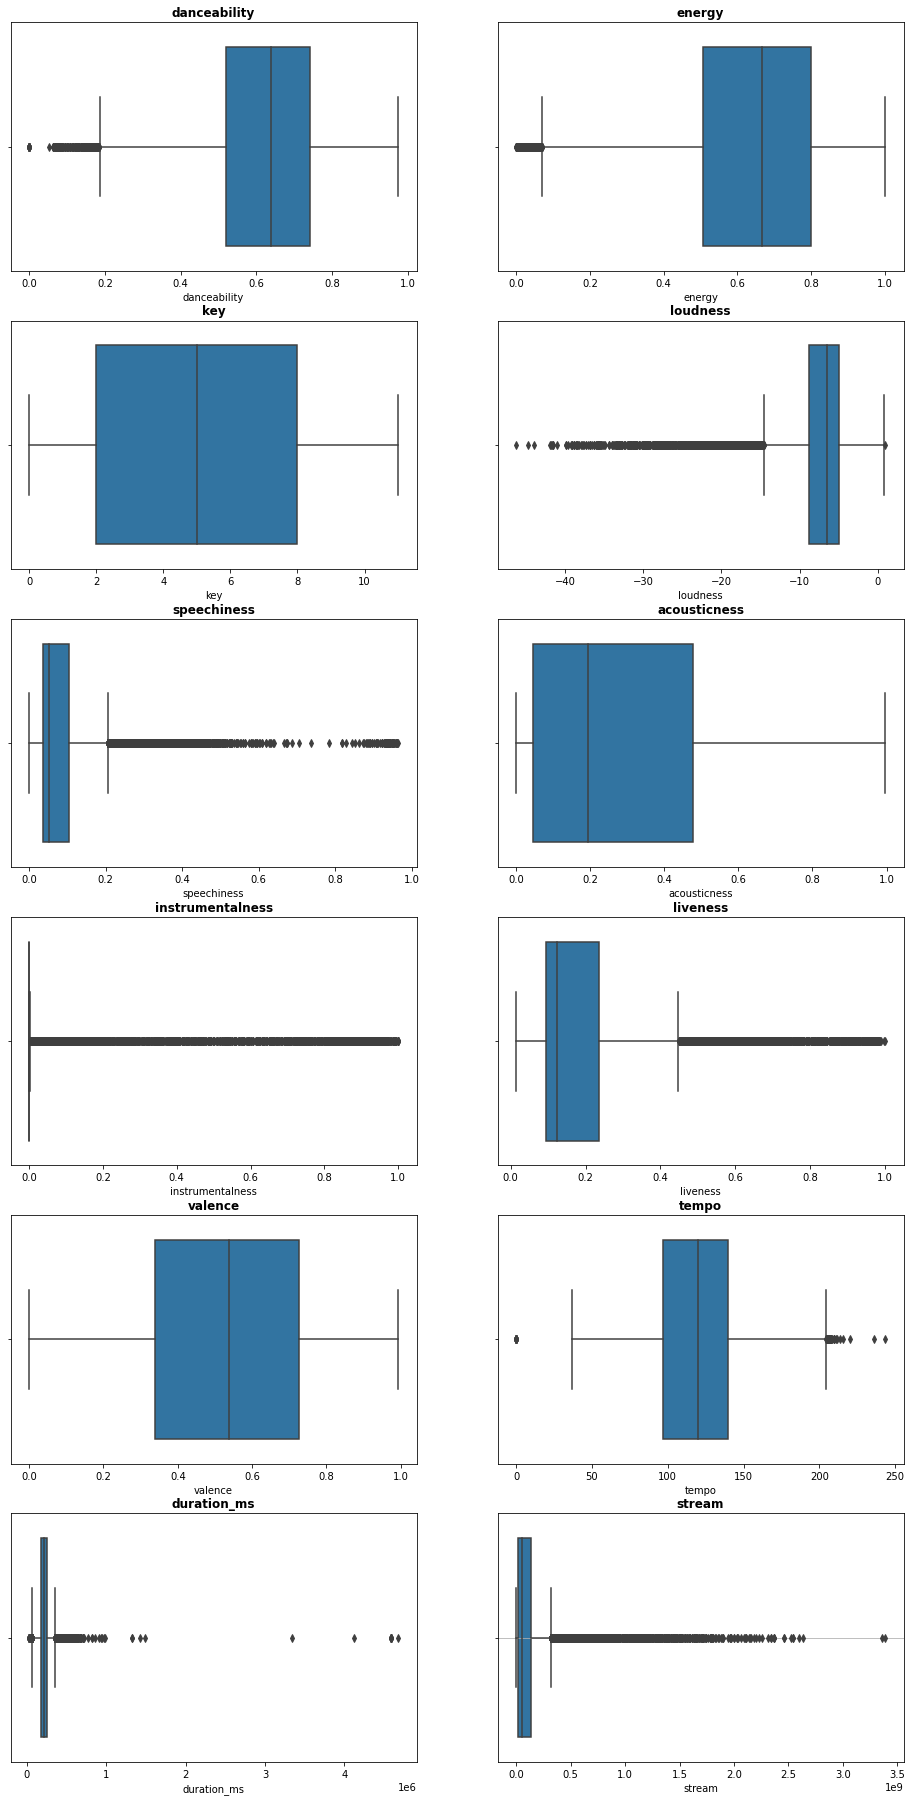

In [12]:
cols = ['danceability', 'energy', 
        'key', 'loudness', 
        'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 
        'valence', 'tempo', 
        'duration_ms', 'stream']
fig, (axes) = plt.subplots(6, 2, figsize = (16, 32))
for i in range(12):
    sns.boxplot(data = df, x = cols[i], ax = axes[i // 2][i % 2])
    axes[i // 2][i % 2].set_title(cols[i], fontdict = {'weight': 'bold'})
    plt.grid()

По признакам **key, acousticness, valence** нет смысла выделять выбросы.

Самыми показательными признаками с точки зрения здравого смысла в данном случае являются **Duration, tempo, loudness**, поскольку:
* Слишком долгие композиции вряд ли являются репрезентативными для целей нашего анализа
* Слишком тихие композиции - аналогично
* Композиции с нулевым темпом - предположительно звуки дождя и природы / подкасты, нуждается в дополнительной проверке
* Композиции с аномально высоким темпом - скорее либо экспериментальная музыка, либо крайне специфичные жанры

Весьма вероятно, что часть выбросов по другим признакам будет объяснена композициями с аномальными значениями по тем признакам, по которым будем проводить чистку. Поэтому после удаления выбросов по логически объяснимым переменным заново посмотрим на распределение всех признаков.

**Для начала проанализируем композиции с нулевым темпом:**

In [13]:
df.query('tempo == 0').groupby(by = 'artist', as_index = False).agg({'track': 'nunique'})

,artist,track
0,Lang Lang,1
1,Louis Armstrong,1
2,Luciano Pavarotti,1
3,M83,1
4,Ocean Sounds,1
5,Ocean Waves For Sleep,1
6,The Alchemist,1
7,White Noise Baby Sleep,4
8,White Noise for Babies,6


12 из 17 композиций судя по исполнителям и названиям коммпозиций - это белый шум / звуки природы, для нашего анализа они не релевантны.

5 оставшихся композиций скорее всего имеют нулевой темп в связи с техническими особенностями системы Spotify / при сборе данных.

* Например, исходя из состава выборки (присутствуют классические музыканты) можно предположить, что система проставляет значение 0, если темп композиции не имеет фиксированного значения*. 

**в классике зачастую можно встретить изменение темпа или размерности такта*

**Посмотрим также на композиции с темпом выше верхней границы интервала +- 1.5 межквартильных размаха:**

In [14]:
q1 = df['tempo'].quantile(0.25)
q3 = df['tempo'].quantile(0.75)
delta_q = q3 - q1
df.query('tempo > @q3 + 1.5 * @delta_q')

,id,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream,ln_stream
284,284,Frank Sinatra,Somethin' Stupid,The World We Knew,album,0.257,0.3380,4.0,-12.902,0.0357,0.73600,0.000000,0.2520,0.5440,207.356,162493.0,182673374.0,19.023210
705,705,Maná,Mariposa Traicionera,Mariposa Traicionera,single,0.622,0.6470,4.0,-6.913,0.0352,0.52400,0.000048,0.0872,0.8150,206.037,243307.0,48090397.0,17.688593
903,903,Alejandro Fernández,Mariposa Traicionera,Mariposa Traicionera,single,0.622,0.6470,4.0,-6.913,0.0352,0.52400,0.000048,0.0872,0.8150,206.037,243307.0,48090397.0,17.688593
1194,1194,Nat King Cole,The Happiest Christmas Tree,The Christmas Song (Expanded Edition),album,0.499,0.4560,0.0,-11.528,0.4000,0.75300,0.000000,0.8610,0.9400,205.882,103747.0,62640798.0,17.952927
1265,1265,Los Tigres Del Norte,Tumba Falsa,La Garra De...,album,0.595,0.6460,10.0,-9.308,0.0887,0.28400,0.000000,0.0433,0.9440,209.695,166227.0,44965310.0,17.621402
1341,1341,Juan Gabriel,Caray,Todo,album,0.506,0.4850,2.0,-12.083,0.0400,0.67300,0.000000,0.1520,0.9570,207.081,229040.0,67775921.0,18.031718
1411,1411,Bing Crosby,Mele Kalikimaka - Single Version,Their Complete Recordings Together,album,0.513,0.1560,3.0,-13.668,0.0717,0.80800,0.000000,0.3220,0.5890,207.975,172173.0,134030765.0,18.713580
1570,1570,R.E.M.,It's The End Of The World As We Know It (And I...,Document (R.E.M. No. 5),album,0.381,0.8940,7.0,-8.638,0.0370,0.02580,0.000000,0.0251,0.7970,205.528,246933.0,180557820.0,19.011562
1784,1784,Journey,Lights,Infinity,album,0.193,0.4980,7.0,-9.901,0.0381,0.10700,0.007110,0.3320,0.3440,205.422,190333.0,74842642.0,18.130898
2217,2217,Paul McCartney,FourFiveSeconds,FourFiveSeconds,single,0.582,0.2720,2.0,-5.662,0.0501,0.87500,0.000000,0.1300,0.3540,205.846,188238.0,947117209.0,20.668933


Темп в рамках разумного, при этом количество прослушиваний довольно высокое, поэтому вряд ли имеет смысл сразу убрать эти композиции.

**Уберем композиции с темпом, находящимся ниже нижней границы интервала +- 1.5 межквартильных размаха от Q1 и Q3:**

In [15]:
def clean_data(df, col, method):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    delta_q = q3 - q1
    if method == 'full':
        return df.query(f'@q1 - 1.5 * @delta_q <= {col} <= @q3 + 1.5 * @delta_q')
    elif method == 'lower':
        return df.query(f'@q1 - 1.5 * @delta_q <= {col}')
    elif method == 'higher':
        return df.query(f'{col} <= @q3 + 1.5 * @delta_q')

In [16]:
df = clean_data(df, 'tempo', 'lower')

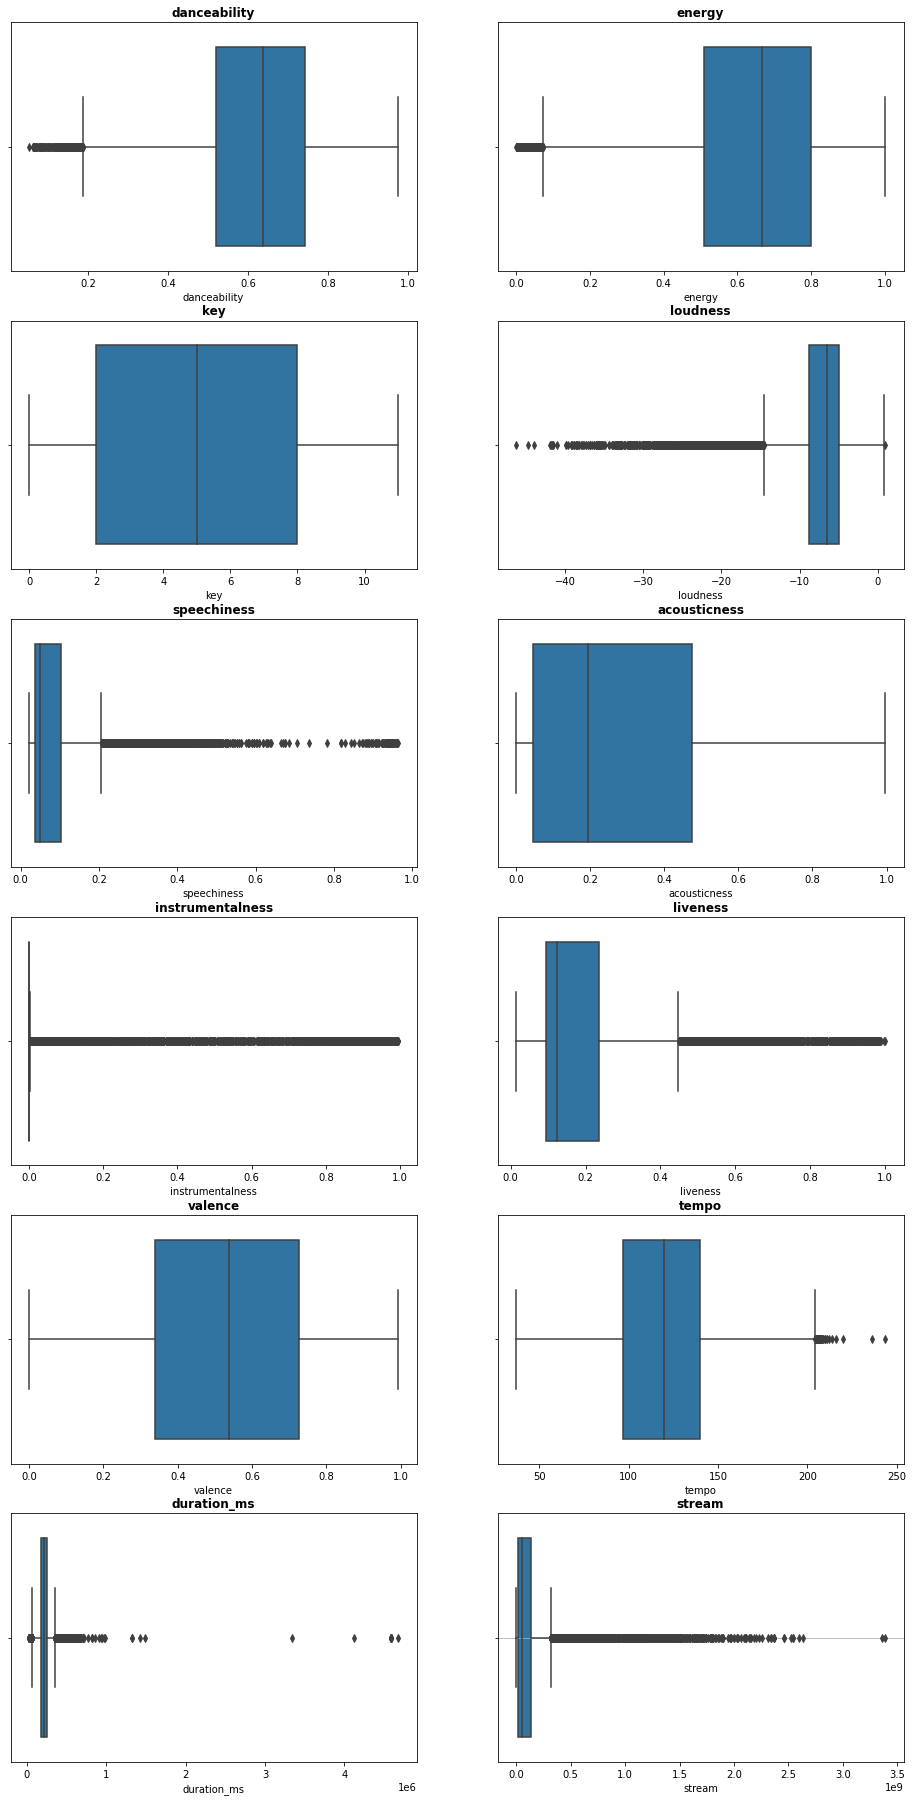

In [17]:
cols = ['danceability', 'energy', 
        'key', 'loudness', 
        'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 
        'valence', 'tempo', 
        'duration_ms', 'stream']
fig, (axes) = plt.subplots(6, 2, figsize = (16, 32))
for i in range(12):
    sns.boxplot(data = df, x = cols[i], ax = axes[i // 2][i % 2])
    axes[i // 2][i % 2].set_title(cols[i], fontdict = {'weight': 'bold'})
    plt.grid()

1. Ситуация с темпом успокоилась, на очереди длительность произведений. Исходя из сооображений здравого смысла, композиции > 10 минут вряд ли будут репрезентативны. Судя по боксплоту для длительности, верхняя граница интервала +-1.5 межквартильных размаха находится около 400 000 миллисекунд, т.е. ~6.5 минут. 

Это подтверждает общую логику относительно длительности композиций.

С другой стороны, слишком короткие композиции также будут нерепрезентативны, учитывая насколько узкий интервал на графике.

2. Громкость композиций большинства современных треков обусловлена стандартами сведения и мастеринга композиций, а также стандартами громкости стриминговых сервисов. Композиции, которые находятся сильно ниже по уровню громкости это скорее исключения из правил, однако бывают и классические произведения, которые имеют более низкий уровень громкости с целью сохранения динамики при прослушивании. Тем не менее, судя по графику это условное "меньшинство", поэтому для нашего анализа они скорее не представляют интереса.

**Уберем композиции с длительностью и громкостью, выходящими за рамки границ интервала +- 1.5 межквартильных размаха от Q1 и Q3:**

In [18]:
df = clean_data(df, 'duration_ms', 'full')
df = clean_data(df, 'loudness', 'lower')

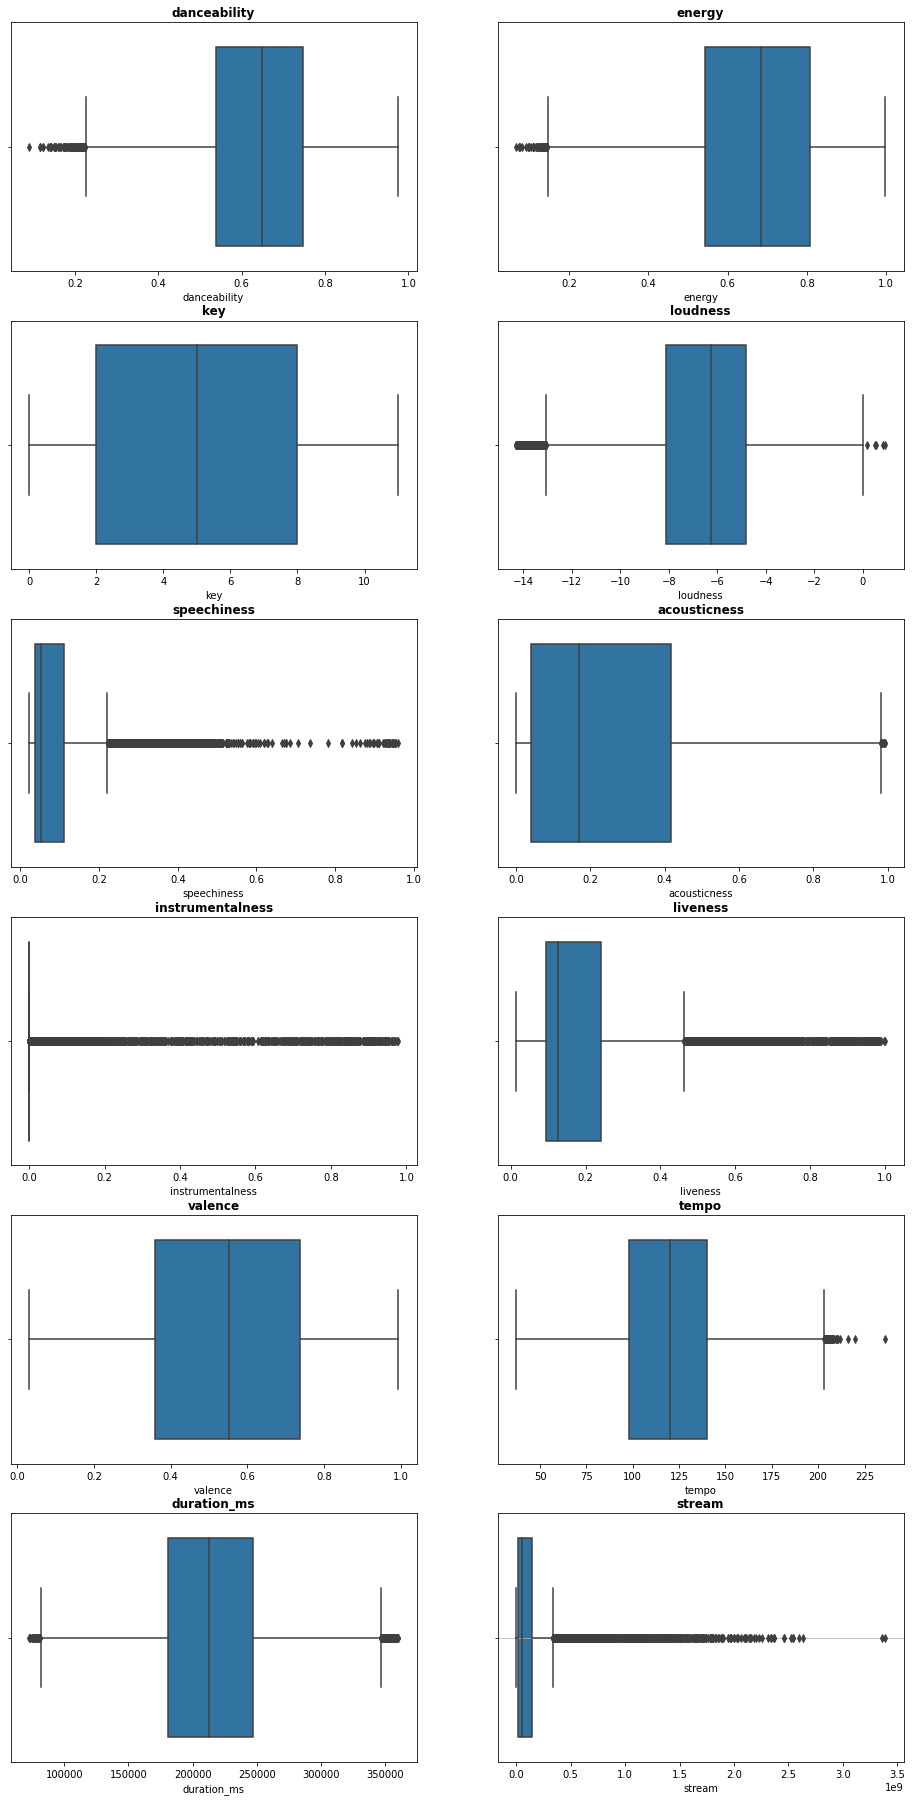

In [19]:
cols = ['danceability', 'energy', 
        'key', 'loudness', 
        'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 
        'valence', 'tempo', 
        'duration_ms', 'stream']
fig, (axes) = plt.subplots(6, 2, figsize = (16, 32))
for i in range(12):
    sns.boxplot(data = df, x = cols[i], ax = axes[i // 2][i % 2])
    axes[i // 2][i % 2].set_title(cols[i], fontdict = {'weight': 'bold'})
    plt.grid()

* **Instrumentalness** - коэффициент, предсказывающий отсутствие слов в композиции. Чем ближе к 1, тем выше вероятность, что в композиции нет слов. На графике заметно, что подавляющее большинство композиций имеют значения этого коэффициента, близкие к нулю. 


* **Speechiness** - коэффициент, показывающий, насколько велика вероятность того, что композиция состоит целиком из речи, без музыки. По оценке авторов изначального датасета, при значениях > 0.66 вероятность этого крайне велика. 


* **Liveness** - коэффициент, показывающий, насколько вероятно, что данная композиция является записью живого выступления артиста (определяет, есть ли публика на записи). 

**Уберем композиции со значением признаков за рамками интервала, поскольку такие композиции сильно отличаются от среднестатистического музыкального трека:**

In [20]:
df = clean_data(df, 'speechiness', 'higher')
df = clean_data(df, 'instrumentalness', 'higher')
df = clean_data(df, 'liveness', 'higher')

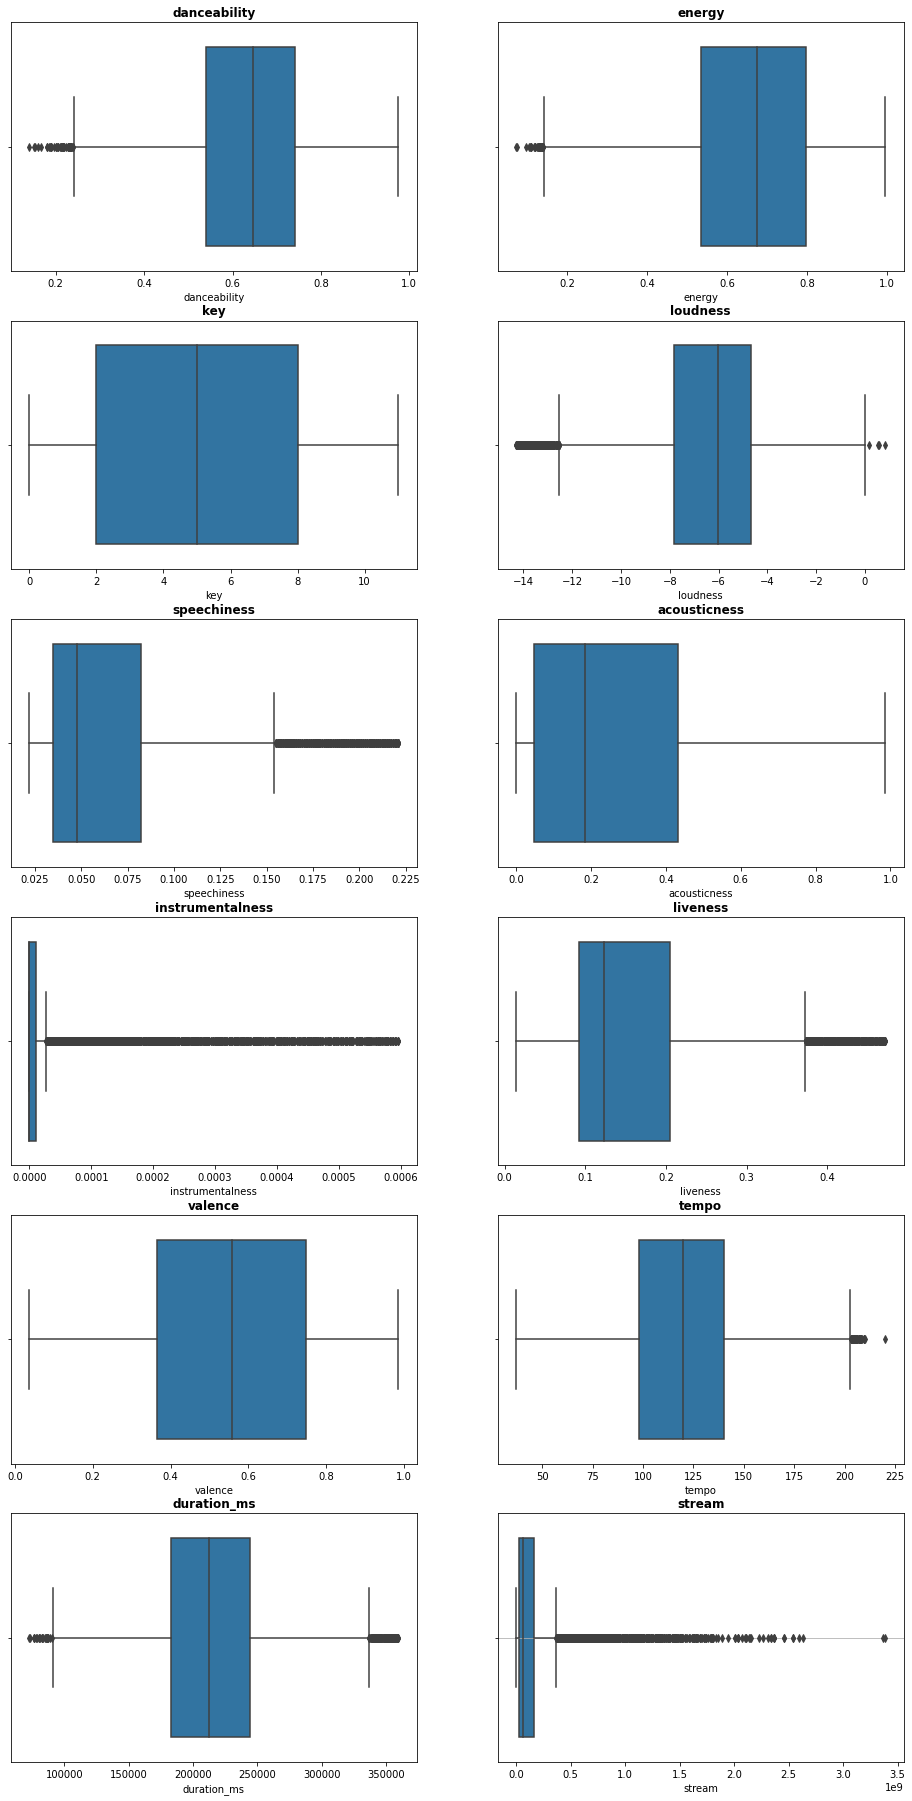

In [21]:
cols = ['danceability', 'energy', 
        'key', 'loudness', 
        'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 
        'valence', 'tempo', 
        'duration_ms', 'stream']
fig, (axes) = plt.subplots(6, 2, figsize = (16, 32))
for i in range(12):
    sns.boxplot(data = df, x = cols[i], ax = axes[i // 2][i % 2])
    axes[i // 2][i % 2].set_title(cols[i], fontdict = {'weight': 'bold'})
    plt.grid()

In [22]:
df.instrumentalness.value_counts(normalize = True)

0.000000    0.578132
0.000001    0.001186
0.000014    0.001186
0.000001    0.001101
0.000012    0.001016
              ...   
0.000361    0.000085
0.000091    0.000085
0.000046    0.000085
0.000068    0.000085
0.000056    0.000085
Name: instrumentalness, Length: 1761, dtype: float64

Несмотря на вычищение выбросов по признаку **instrumentalness**, видно, что у значительной части композиций значение признака практически равно нулю. Это ставит под сомнение корректность использования данной переменной в качестве регрессора, однако при этом визуально распределение переменной **stream** не изменяется. Таким образом, оставив только композиции со значением этого признака, близким нулю, мы потенциально улучшаемм однородность выборки.

### Постройте матрицу корреляций числовых переменных.
На данном этапе взглянем на взаимосвязь переменных между собой:

In [23]:
df.corr()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream,ln_stream
id,1.000000,0.151577,-0.005393,0.031830,0.182198,0.150509,-0.017288,-0.067765,-0.008254,-0.102972,0.009030,-0.262253,0.072918,0.035842
danceability,0.151577,1.000000,0.119102,0.027782,0.146026,0.254898,-0.155961,-0.011572,-0.079433,0.407408,-0.167044,-0.185926,0.041871,0.007325
energy,-0.005393,0.119102,1.000000,0.025650,0.690100,0.184535,-0.601129,0.020226,0.134955,0.336303,0.111105,-0.004948,-0.001605,0.004008
key,0.031830,0.027782,0.025650,1.000000,0.026681,0.031811,-0.014157,0.008799,-0.034279,0.036535,-0.006944,-0.008917,-0.017842,-0.019757
loudness,0.182198,0.146026,0.690100,0.026681,1.000000,0.135930,-0.414092,-0.089478,0.086115,0.168581,0.075015,-0.087764,0.075670,0.076202
speechiness,0.150509,0.254898,0.184535,0.031811,0.135930,1.000000,-0.145067,-0.046051,0.026871,0.071484,0.053544,-0.121119,-0.005591,-0.034028
acousticness,-0.017288,-0.155961,-0.601129,-0.014157,-0.414092,-0.145067,1.000000,-0.018131,-0.071379,-0.096279,-0.071568,-0.029610,-0.076291,-0.074890
instrumentalness,-0.067765,-0.011572,0.020226,0.008799,-0.089478,-0.046051,-0.018131,1.000000,-0.011602,-0.008498,-0.007377,0.061572,-0.031286,-0.034975
liveness,-0.008254,-0.079433,0.134955,-0.034279,0.086115,0.026871,-0.071379,-0.011602,1.000000,0.013041,0.012480,-0.007187,-0.020499,-0.015372
valence,-0.102972,0.407408,0.336303,0.036535,0.168581,0.071484,-0.096279,-0.008498,0.013041,1.000000,0.066355,-0.155385,-0.056259,-0.064424


In [24]:
matrix0 # Корреляционная матрица до удаления выбросов

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream,ln_stream
id,1.000000,0.173753,0.049473,0.023531,0.181691,0.106726,-0.045586,-0.072372,-0.023463,-0.065683,0.045623,-0.126152,0.071653,0.047508
danceability,0.173753,1.000000,0.240059,0.039412,0.358164,0.223764,-0.284050,-0.322343,-0.083749,0.465239,-0.064026,-0.086687,0.073375,0.057188
energy,0.049473,0.240059,1.000000,0.030531,0.744936,0.084524,-0.659188,-0.315310,0.176698,0.391252,0.156541,0.023118,0.044239,0.063465
key,0.023531,0.039412,0.030531,1.000000,0.026650,0.021694,-0.031929,-0.000325,-0.012166,0.043089,0.001589,0.002864,-0.006287,-0.007037
loudness,0.181691,0.358164,0.744936,0.026650,1.000000,0.060472,-0.549236,-0.553959,0.091313,0.316387,0.145043,0.013017,0.118695,0.164321
speechiness,0.106726,0.223764,0.084524,0.021694,0.060472,1.000000,-0.094569,-0.110860,0.068885,0.060673,0.049545,-0.050319,-0.016239,-0.123082
acousticness,-0.045586,-0.284050,-0.659188,-0.031929,-0.549236,-0.094569,1.000000,0.280342,-0.044781,-0.204241,-0.127549,-0.027481,-0.104843,-0.117432
instrumentalness,-0.072372,-0.322343,-0.315310,-0.000325,-0.553959,-0.110860,0.280342,1.000000,-0.059320,-0.273143,-0.079804,-0.008669,-0.091942,-0.128894
liveness,-0.023463,-0.083749,0.176698,-0.012166,0.091313,0.068885,-0.044781,-0.059320,1.000000,0.033226,0.010713,-0.005604,-0.039617,-0.051418
valence,-0.065683,0.465239,0.391252,0.043089,0.316387,0.060673,-0.204241,-0.273143,0.033226,1.000000,0.090870,-0.050567,-0.012109,-0.000735


Несмотря на очищение данных, корреляционная матрица не сильно изменилась относительно изначальной, при этом большая часть значений коэффициента корреляции переменной **streams** уменьшилась по модулю

### Визуализируйте данные (например, с помощью matplotlib и seaborn).
* постройте гистограммы распределения числовых переменных
* проверьте попарные связи переменных друг с другом (например, с помощью scatterplot) и с целевой переменной

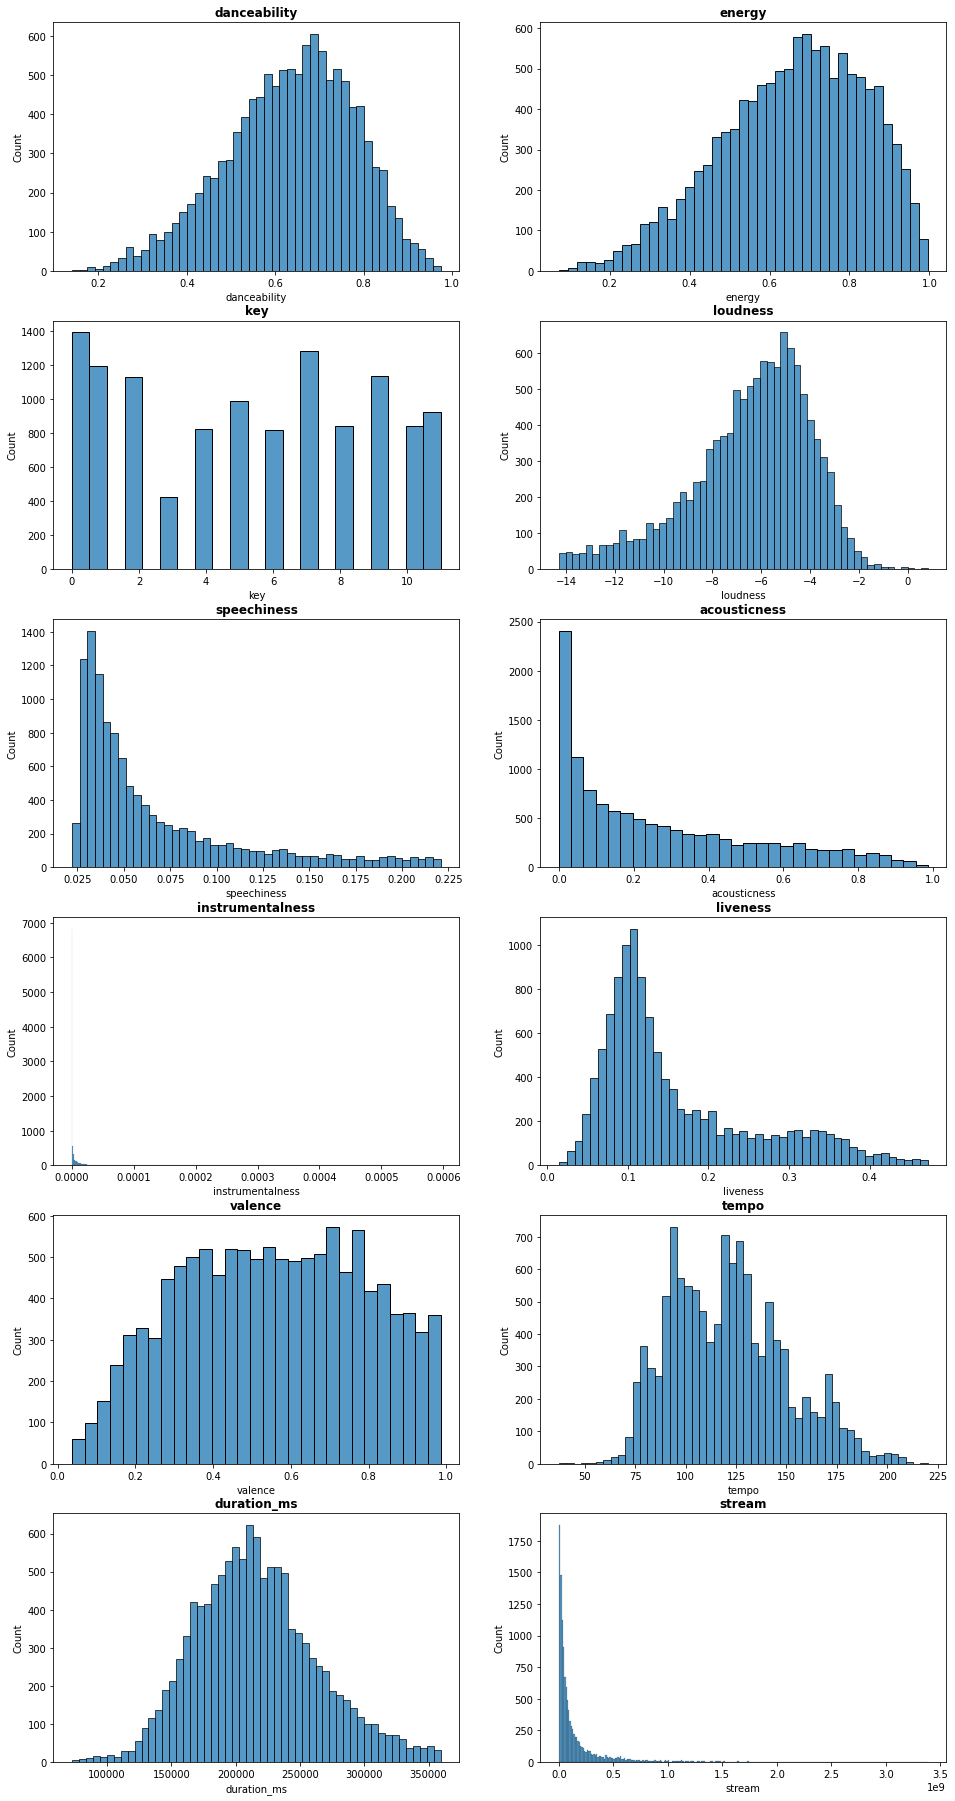

In [25]:
# Построим гистограммы распределения:
cols = ['danceability', 'energy', 
        'key', 'loudness', 
        'speechiness', 'acousticness', 
        'instrumentalness', 'liveness', 
        'valence', 'tempo', 
        'duration_ms', 'stream']
fig, (axes) = plt.subplots(6, 2, figsize = (16, 32))
for i in range(12):
    sns.histplot(data = df, x = cols[i], ax = axes[i // 2][i % 2])
    axes[i // 2][i % 2].set_title(cols[i], fontdict = {'weight': 'bold'})
    plt.grid()

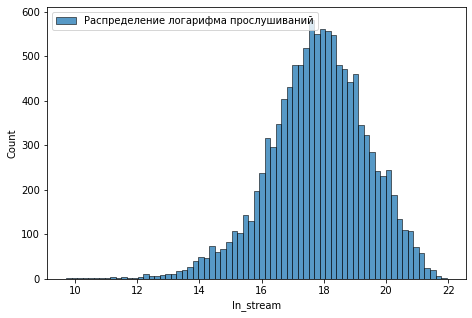

In [26]:
plt.figure(figsize = (7.5, 5))
sns.histplot(data = df, x = 'ln_stream', label = 'Распределение логарифма прослушиваний')
plt.legend()

Судя по графикам, переменные **speechiness, acousticness, instrumentalness, stream** после чистки имеют распределение, похожее на логнормальное. Проверим это, прологарифмировав переменные (график логарифма переменной **streams** приведен выше):

In [27]:
def log_col(col):
    import math
    log_arr = []
    for a in col:
        if a != 0:
            log_arr.append(math.log(a))
        else:
            log_arr.append(np.nan)
    return log_arr

In [28]:
df['ln_speechiness'] = log_col(df['speechiness'])
df['ln_acousticness'] = log_col(df['acousticness'])
df['ln_instrumentalness'] = log_col(df['instrumentalness'])

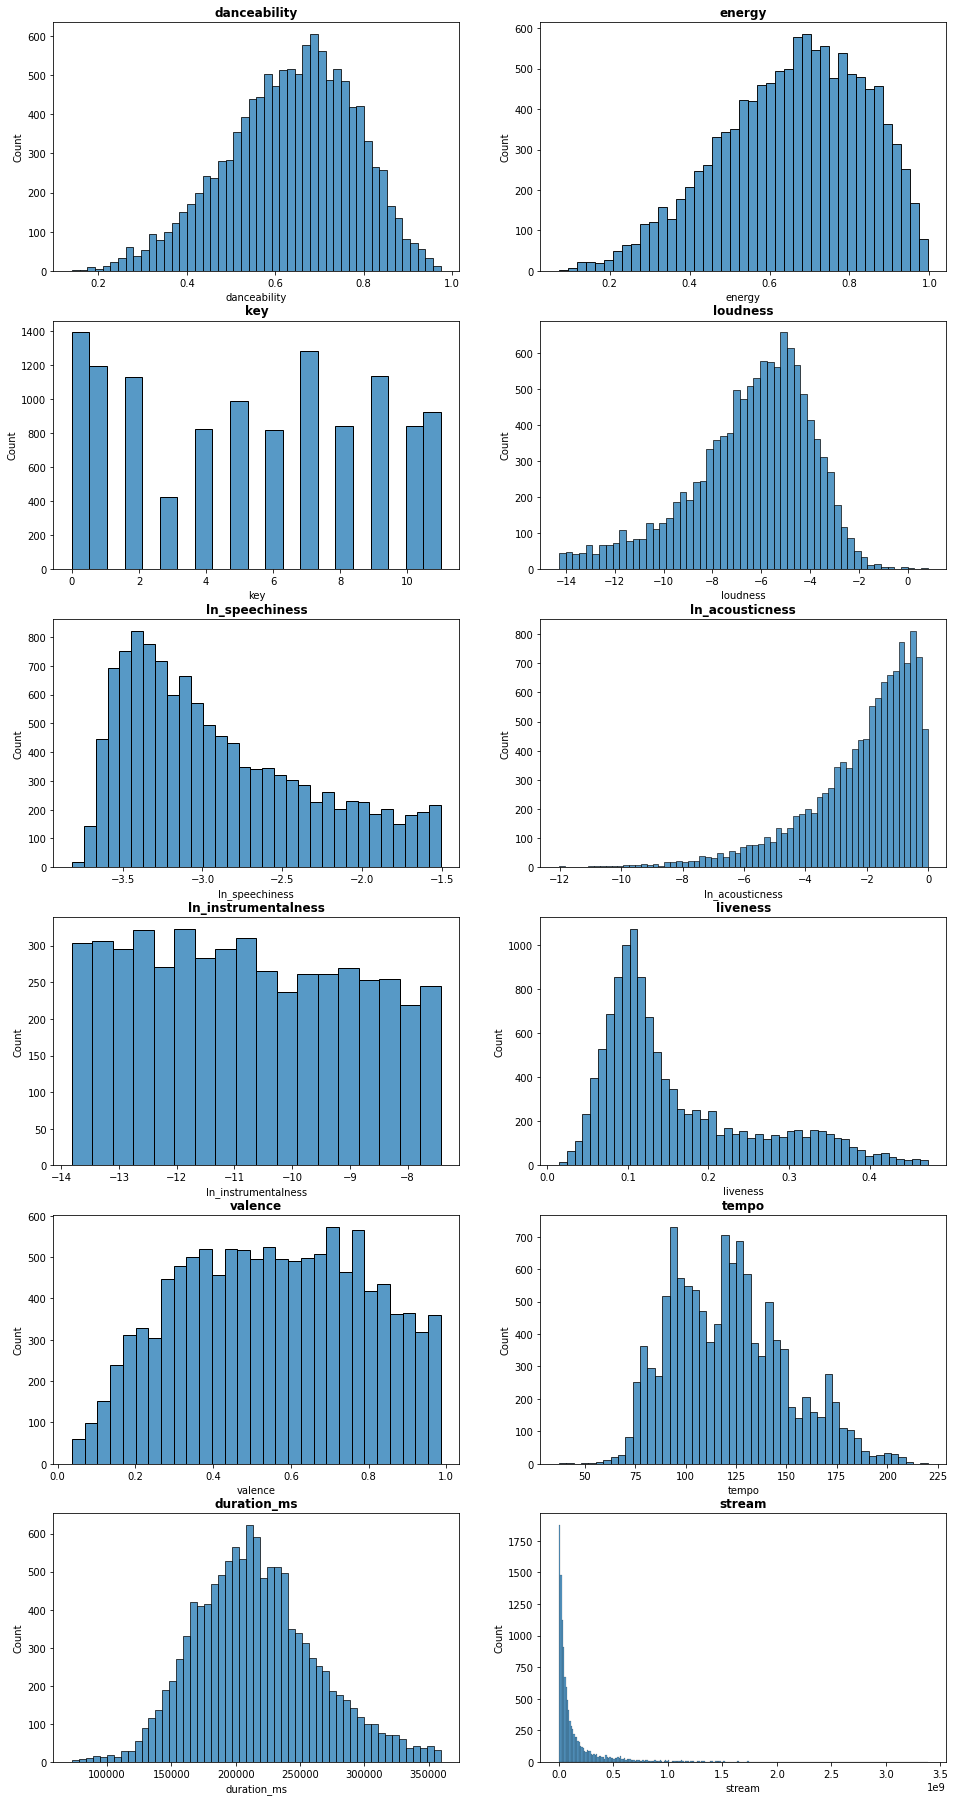

In [29]:
# Построим гистограммы распределения:
cols = ['danceability', 'energy', 
        'key', 'loudness', 
        'ln_speechiness', 'ln_acousticness', 
        'ln_instrumentalness', 'liveness', 
        'valence', 'tempo', 
        'duration_ms', 'stream']
fig, (axes) = plt.subplots(6, 2, figsize = (16, 32))
for i in range(12):
    sns.histplot(data = df, x = cols[i], ax = axes[i // 2][i % 2])
    axes[i // 2][i % 2].set_title(cols[i], fontdict = {'weight': 'bold'})
    plt.grid()

После логарифмирования графики распределения значений переменных все еще не похожи на нормальные.

**Проверим, не была ли причиной чистка от выбросов.**
Для этого загрузим изначальный датасет, и прологарифмируем переменные:

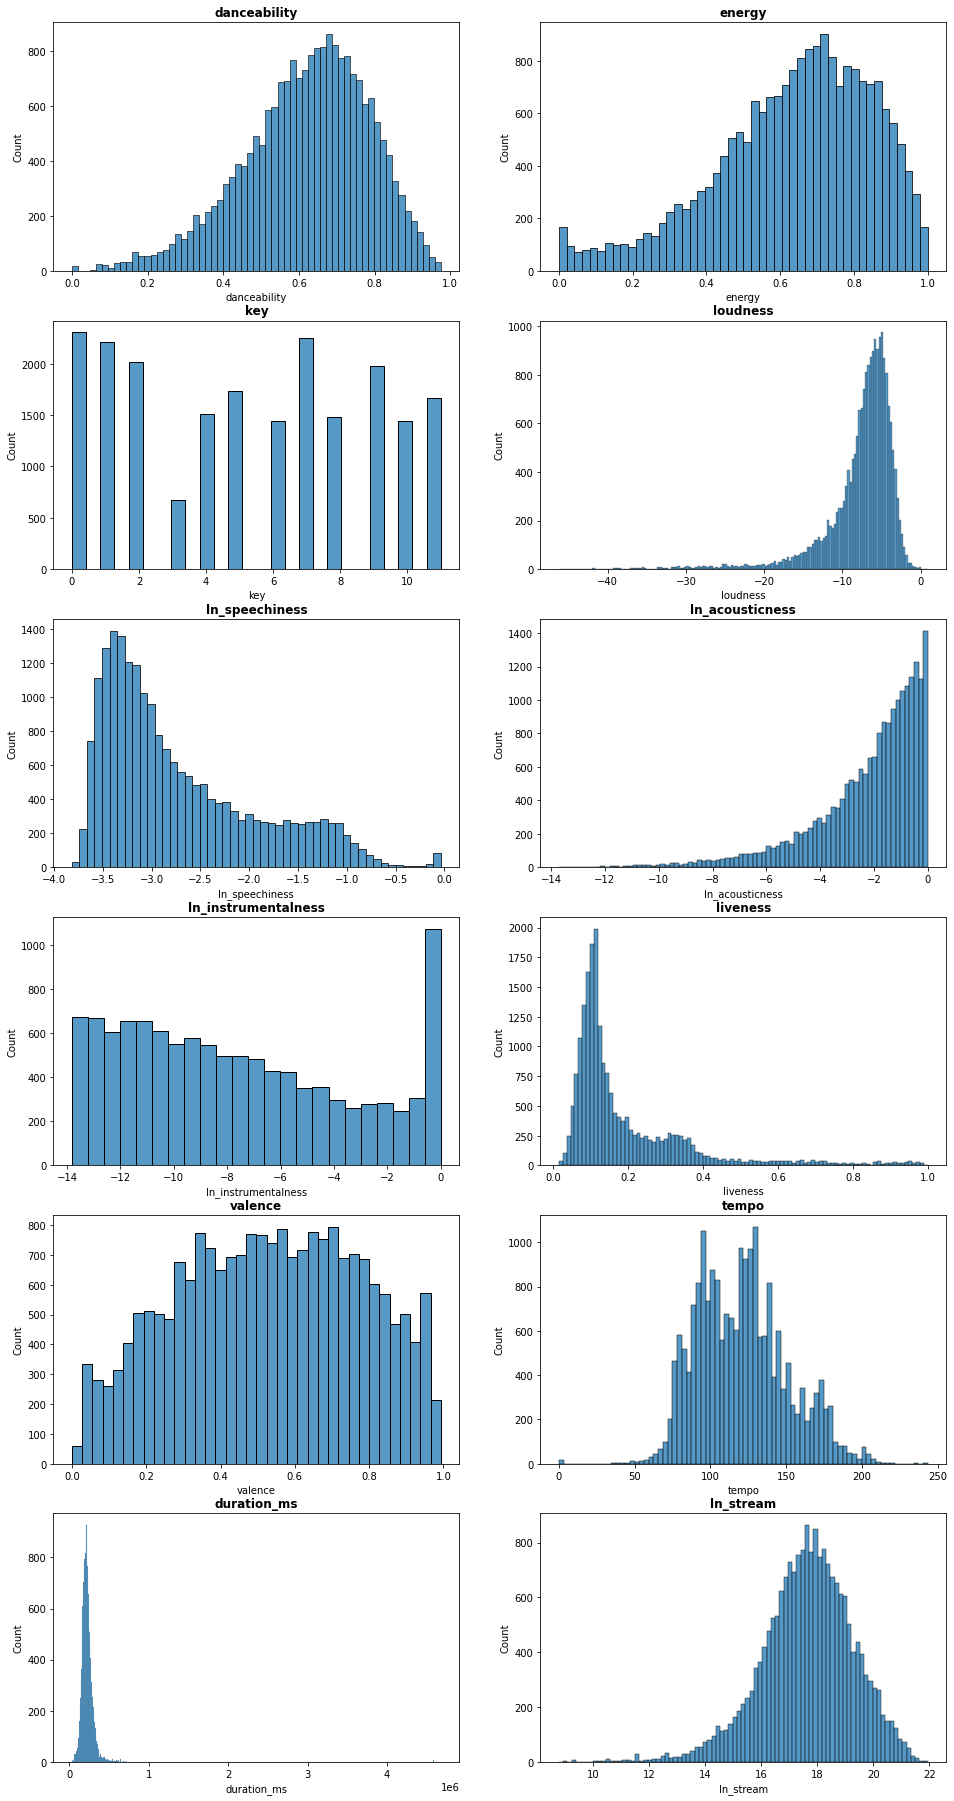

In [30]:
df_old = pd.read_csv('Spotify Dataset from Kaggle.csv')
d = {}
for c in df_old.columns:
    d[c] = c.lower()
d['Unnamed: 0'] = 'id'
df_old = df_old.rename(columns = d)


df_old['ln_speechiness'] = log_col(df_old['speechiness'])
df_old['ln_acousticness'] = log_col(df_old['acousticness'])
df_old['ln_instrumentalness'] = log_col(df_old['instrumentalness'])
df_old['ln_stream'] = log_col(df_old['stream'])
# Построим гистограммы распределения:
cols = ['danceability', 'energy', 
        'key', 'loudness', 
        'ln_speechiness', 'ln_acousticness', 
        'ln_instrumentalness', 'liveness', 
        'valence', 'tempo', 
        'duration_ms', 'ln_stream']
fig, (axes) = plt.subplots(6, 2, figsize = (16, 32))
for i in range(12):
    sns.histplot(data = df_old, x = cols[i], ax = axes[i // 2][i % 2])
    axes[i // 2][i % 2].set_title(cols[i], fontdict = {'weight': 'bold'})
    plt.grid()

Визуально прологарифмированные признаки изначально также не имели нормального распределения

**Проверим, есть ли какие-либо взаимосвязи в очищенных данных с помощью сравнений с целевой переменной stream, для начала попробуем использовать её логарифм:**

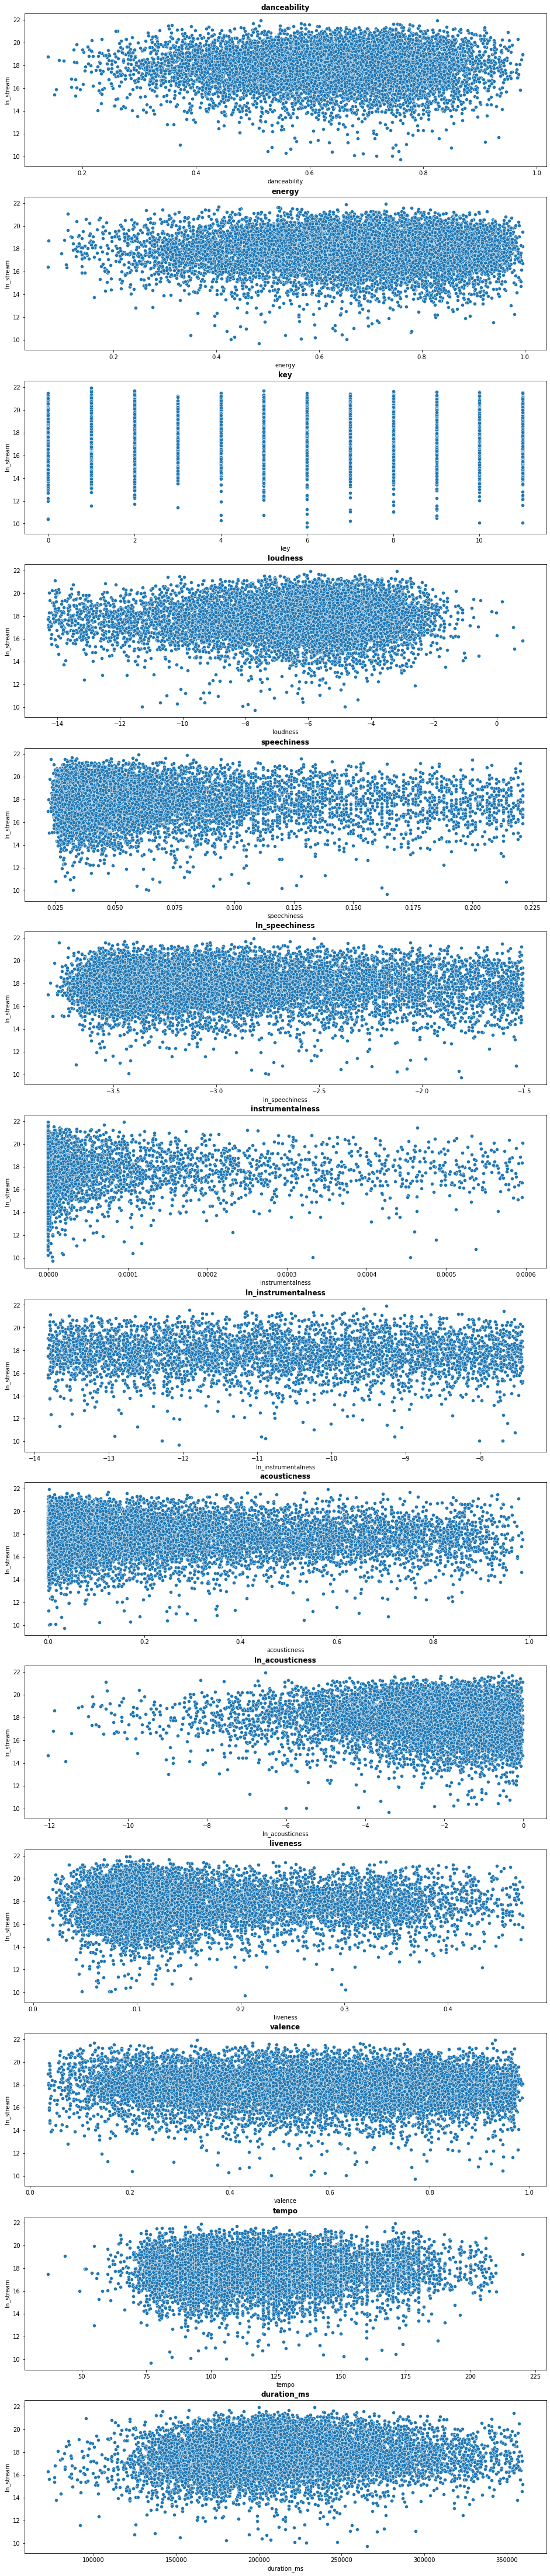

In [31]:
# Построим графики:
cols = ['danceability', 'energy', 
        'key', 'loudness', 
        'speechiness', 'ln_speechiness', 
        'instrumentalness', 'ln_instrumentalness',
        'acousticness', 'ln_acousticness', 
        'liveness', 'valence', 
        'tempo', 'duration_ms']
fig, axes = plt.subplots(14, 1, figsize = (16, 80))
for i in range(14):
    sns.scatterplot(data = df, x = cols[i], y = 'ln_stream', ax = axes[i])
    axes[i].set_title(cols[i], fontdict = {'weight': 'bold'})
    plt.grid()

#### Пробуем сгруппировать данные по альбомам и артистам

In [42]:
df_avg = df.copy()
df_avg = df_avg.drop(['ln_stream', 'ln_speechiness', 'ln_acousticness', 'ln_instrumentalness'], axis = 1)
df_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11807 entries, 4 to 20715
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11807 non-null  int64  
 1   artist            11807 non-null  object 
 2   track             11807 non-null  object 
 3   album             11807 non-null  object 
 4   album_type        11807 non-null  object 
 5   danceability      11807 non-null  float64
 6   energy            11807 non-null  float64
 7   key               11807 non-null  float64
 8   loudness          11807 non-null  float64
 9   speechiness       11807 non-null  float64
 10  acousticness      11807 non-null  float64
 11  instrumentalness  11807 non-null  float64
 12  liveness          11807 non-null  float64
 13  valence           11807 non-null  float64
 14  tempo             11807 non-null  float64
 15  duration_ms       11807 non-null  float64
 16  stream            11807 non-null  float6

In [44]:
df_avg = df_avg.groupby(['artist', 'album', 'album_type'], as_index = False).agg({'track': 'nunique', 
                                                                                  'danceability': 'mean', 
                                                                                  'energy': 'mean', 
                                                                                  'key': 'mean', 
                                                                                  'loudness': 'mean', 
                                                                                  'speechiness': 'mean', 
                                                                                  'acousticness': 'mean', 
                                                                                  'instrumentalness': 'mean', 
                                                                                  'liveness': 'mean', 
                                                                                  'valence': 'mean', 
                                                                                  'valence': 'mean', 
                                                                                  'tempo': 'mean', 
                                                                                  'duration_ms': 'mean', 
                                                                                  'stream': 'mean'})

In [47]:
for col in ['danceability', 'energy', 
        'key', 
        'speechiness', 
        'instrumentalness',
        'acousticness', 
        'liveness', 'valence', 
        'tempo', 'duration_ms', 
        'stream']:
    df_avg[f'ln_{col}'] = log_col(df_avg[col])

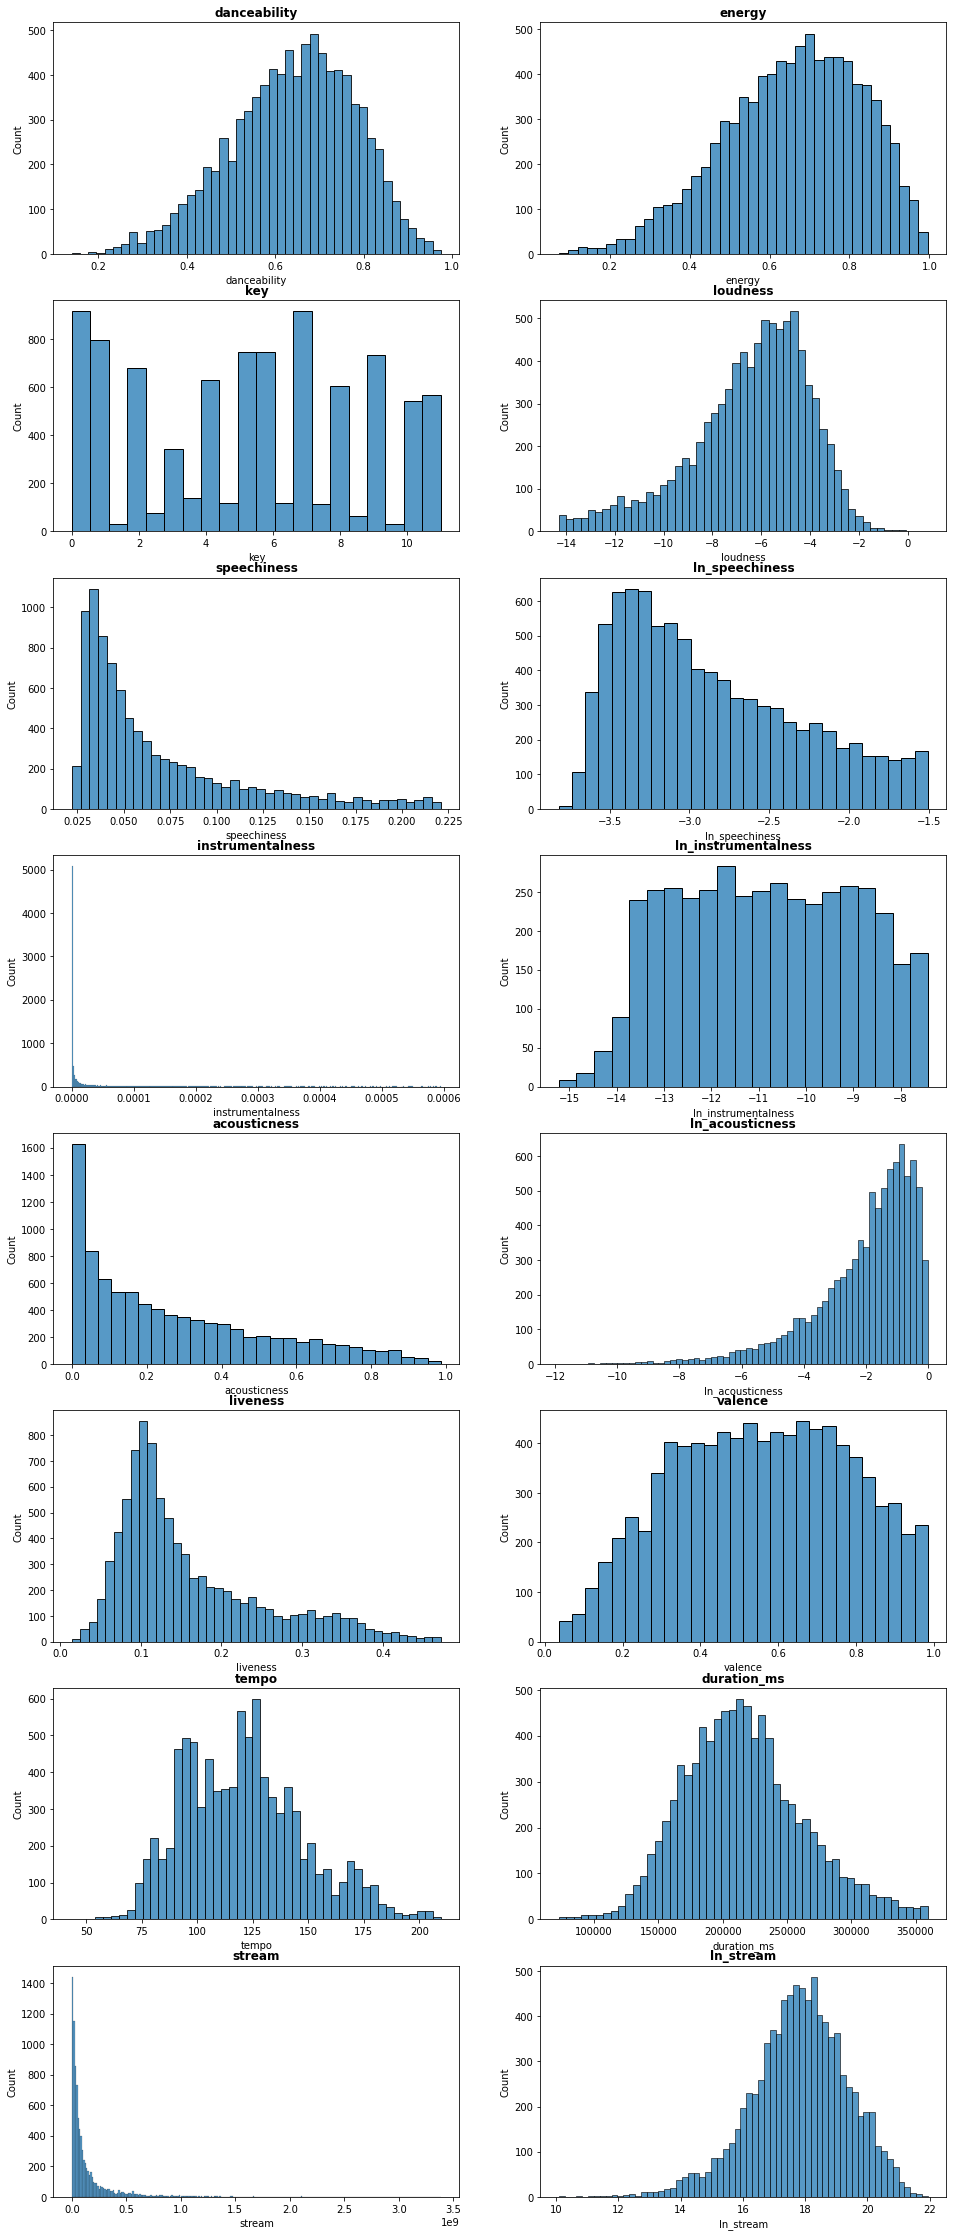

In [49]:
cols = ['danceability', 'energy', 
        'key', 'loudness', 
        'speechiness', 'ln_speechiness', 
        'instrumentalness', 'ln_instrumentalness',
        'acousticness', 'ln_acousticness', 
        'liveness', 'valence', 
        'tempo', 'duration_ms', 
        'stream', 'ln_stream']
fig, (axes) = plt.subplots(8, 2, figsize = (16, 40))
for i in range(16):
    sns.histplot(data = df_avg, x = cols[i], ax = axes[i // 2][i % 2])
    axes[i // 2][i % 2].set_title(cols[i], fontdict = {'weight': 'bold'})
    plt.grid()

In [50]:
df_avg.corr()

,track,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,ln_energy,ln_key,ln_speechiness,ln_instrumentalness,ln_acousticness,ln_liveness,ln_valence,ln_tempo,ln_duration_ms,ln_stream
track,1.000000,-0.059030,-0.005562,0.001896,-0.002580,-0.058304,-0.020565,-0.022828,-0.000295,-0.013672,...,0.010537,-0.004242,-0.031984,-0.100405,0.033364,0.058035,0.026465,0.039135,0.015960,0.105065
danceability,-0.059030,1.000000,0.133955,0.038706,0.168375,0.276381,-0.170352,-0.017251,-0.081795,0.406872,...,0.167975,0.020834,0.305621,-0.027561,0.033220,-0.113753,0.390099,-0.113380,-0.185488,0.011017
energy,-0.005562,0.133955,1.000000,0.039206,0.691459,0.185231,-0.591273,0.017493,0.134154,0.325016,...,0.972988,-0.005205,0.239658,0.008637,-0.483397,0.097056,0.333474,0.132709,0.000701,-0.010388
key,0.001896,0.038706,0.039206,1.000000,0.036495,0.039043,-0.026844,0.011524,-0.037834,0.051056,...,0.041189,0.944325,0.040185,-0.015136,-0.007467,-0.037932,0.049298,-0.018772,-0.014881,-0.013285
loudness,-0.002580,0.168375,0.691459,0.036495,1.000000,0.144148,-0.403247,-0.094416,0.084024,0.166953,...,0.686589,-0.010429,0.181488,-0.092980,-0.308490,0.064962,0.179668,0.090453,-0.087220,0.064008
speechiness,-0.058304,0.276381,0.185231,0.039043,0.144148,1.000000,-0.160712,-0.054363,0.017317,0.071373,...,0.187808,-0.012373,0.961137,-0.036698,-0.094516,0.004087,0.082860,0.029860,-0.122002,-0.036937
acousticness,-0.020565,-0.170352,-0.591273,-0.026844,-0.403247,-0.160712,1.000000,-0.020204,-0.071458,-0.079404,...,-0.610166,0.001010,-0.193512,-0.019490,0.772252,-0.043930,-0.089288,-0.091450,-0.021856,-0.086973
instrumentalness,-0.022828,-0.017251,0.017493,0.011524,-0.094416,-0.054363,-0.020204,1.000000,-0.007996,-0.012845,...,0.011469,0.005273,-0.062963,0.778815,-0.083125,-0.012987,-0.026769,0.001214,0.058793,-0.032379
liveness,-0.000295,-0.081795,0.134154,-0.037834,0.084024,0.017317,-0.071458,-0.007996,1.000000,0.013579,...,0.122590,-0.028776,0.025638,-0.012890,-0.079076,0.954070,0.027928,0.025210,-0.009828,-0.017232
valence,-0.013672,0.406872,0.325016,0.051056,0.166953,0.071373,-0.079404,-0.012845,0.013579,1.000000,...,0.323623,0.068782,0.101507,-0.008580,0.033825,-0.042487,0.951875,0.072495,-0.145903,-0.071590


In [51]:
df_avg_ar = df.copy().drop(['ln_stream', 'ln_speechiness', 'ln_acousticness', 'ln_instrumentalness'], axis = 1)
df_avg_ar = df_avg_ar.groupby(['artist'], as_index = False).agg({'track': 'nunique', 'album': 'nunique',
                                                                                  'danceability': 'mean', 
                                                                                  'energy': 'mean', 
                                                                                  'key': 'mean', 
                                                                                  'loudness': 'mean', 
                                                                                  'speechiness': 'mean', 
                                                                                  'acousticness': 'mean', 
                                                                                  'instrumentalness': 'mean', 
                                                                                  'liveness': 'mean', 
                                                                                  'valence': 'mean', 
                                                                                  'valence': 'mean', 
                                                                                  'tempo': 'mean', 
                                                                                  'duration_ms': 'mean', 
                                                                                  'stream': 'mean'})

In [52]:
df_avg_ar.corr()

,track,album,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,stream
track,1.000000,0.779276,-0.051893,0.040927,0.004726,0.224739,-0.256572,0.002577,-0.296620,-0.053740,0.071181,0.083347,-0.019222,0.104145
album,0.779276,1.000000,0.048818,0.041016,0.014811,0.204629,-0.154692,0.034460,-0.237913,-0.045196,0.096918,0.041778,-0.017434,0.050917
danceability,-0.051893,0.048818,1.000000,0.115262,0.065685,0.208377,0.492179,-0.183700,-0.105198,-0.062382,0.398782,-0.166274,-0.216028,0.023359
energy,0.040927,0.041016,0.115262,1.000000,0.042584,0.730266,0.188791,-0.696846,0.029172,0.198349,0.250086,0.190352,0.060236,0.007918
key,0.004726,0.014811,0.065685,0.042584,1.000000,0.063449,0.016636,-0.008358,0.005787,-0.047331,0.045242,-0.023129,-0.064844,-0.028118
loudness,0.224739,0.204629,0.208377,0.730266,0.063449,1.000000,0.221323,-0.504240,-0.175164,0.124871,0.085417,0.179892,-0.088363,0.116315
speechiness,-0.256572,-0.154692,0.492179,0.188791,0.016636,0.221323,1.000000,-0.224370,-0.111598,0.096251,0.026567,-0.053031,-0.170695,-0.024116
acousticness,0.002577,0.034460,-0.183700,-0.696846,-0.008358,-0.504240,-0.224370,1.000000,-0.031312,-0.106442,-0.034865,-0.109885,-0.082944,-0.146967
instrumentalness,-0.296620,-0.237913,-0.105198,0.029172,0.005787,-0.175164,-0.111598,-0.031312,1.000000,-0.034688,-0.035325,-0.000993,0.097785,-0.038279
liveness,-0.053740,-0.045196,-0.062382,0.198349,-0.047331,0.124871,0.096251,-0.106442,-0.034688,1.000000,0.060680,0.059257,0.002101,-0.034468


In [53]:
for col in ['danceability', 'energy', 
        'key', 
        'speechiness', 
        'instrumentalness',
        'acousticness', 
        'liveness', 'valence', 
        'tempo', 'duration_ms', 
        'stream']:
    df_avg_ar[f'ln_{col}'] = log_col(df_avg_ar[col])

In [54]:
df_avg_ar.corr()

,track,album,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,...,ln_energy,ln_key,ln_speechiness,ln_instrumentalness,ln_acousticness,ln_liveness,ln_valence,ln_tempo,ln_duration_ms,ln_stream
track,1.000000,0.779276,-0.051893,0.040927,0.004726,0.224739,-0.256572,0.002577,-0.296620,-0.053740,...,0.084482,0.059089,-0.194288,-0.270975,0.160646,0.037150,0.132975,0.112727,0.013374,0.195757
album,0.779276,1.000000,0.048818,0.041016,0.014811,0.204629,-0.154692,0.034460,-0.237913,-0.045196,...,0.082942,0.057271,-0.087757,-0.209721,0.182236,0.028086,0.143343,0.066905,0.006358,0.132392
danceability,-0.051893,0.048818,1.000000,0.115262,0.065685,0.208377,0.492179,-0.183700,-0.105198,-0.062382,...,0.152821,0.033268,0.512484,-0.083530,0.060434,-0.069862,0.381186,-0.153258,-0.214153,-0.004597
energy,0.040927,0.041016,0.115262,1.000000,0.042584,0.730266,0.188791,-0.696846,0.029172,0.198349,...,0.977197,0.044718,0.231857,-0.002912,-0.589702,0.198689,0.242463,0.197751,0.067926,0.035453
key,0.004726,0.014811,0.065685,0.042584,1.000000,0.063449,0.016636,-0.008358,0.005787,-0.047331,...,0.045465,0.942206,0.025841,0.023885,0.012211,-0.032842,0.039694,-0.017766,-0.067021,-0.034644
loudness,0.224739,0.204629,0.208377,0.730266,0.063449,1.000000,0.221323,-0.504240,-0.175164,0.124871,...,0.732905,0.046167,0.265590,-0.179756,-0.374483,0.147525,0.100353,0.192537,-0.066588,0.139877
speechiness,-0.256572,-0.154692,0.492179,0.188791,0.016636,0.221323,1.000000,-0.224370,-0.111598,0.096251,...,0.193827,-0.026491,0.965399,-0.112363,-0.144435,0.081477,0.033555,-0.064098,-0.172209,-0.072611
acousticness,0.002577,0.034460,-0.183700,-0.696846,-0.008358,-0.504240,-0.224370,1.000000,-0.031312,-0.106442,...,-0.709283,-0.015737,-0.242972,-0.015916,0.774938,-0.104751,-0.054586,-0.117760,-0.093228,-0.178749
instrumentalness,-0.296620,-0.237913,-0.105198,0.029172,0.005787,-0.175164,-0.111598,-0.031312,1.000000,-0.034688,...,0.001798,0.017664,-0.125749,0.720123,-0.183709,-0.070461,-0.092950,-0.010838,0.081750,-0.071590
liveness,-0.053740,-0.045196,-0.062382,0.198349,-0.047331,0.124871,0.096251,-0.106442,-0.034688,1.000000,...,0.183909,-0.072600,0.097912,-0.054155,-0.116285,0.970087,0.073762,0.053421,0.000627,-0.024764


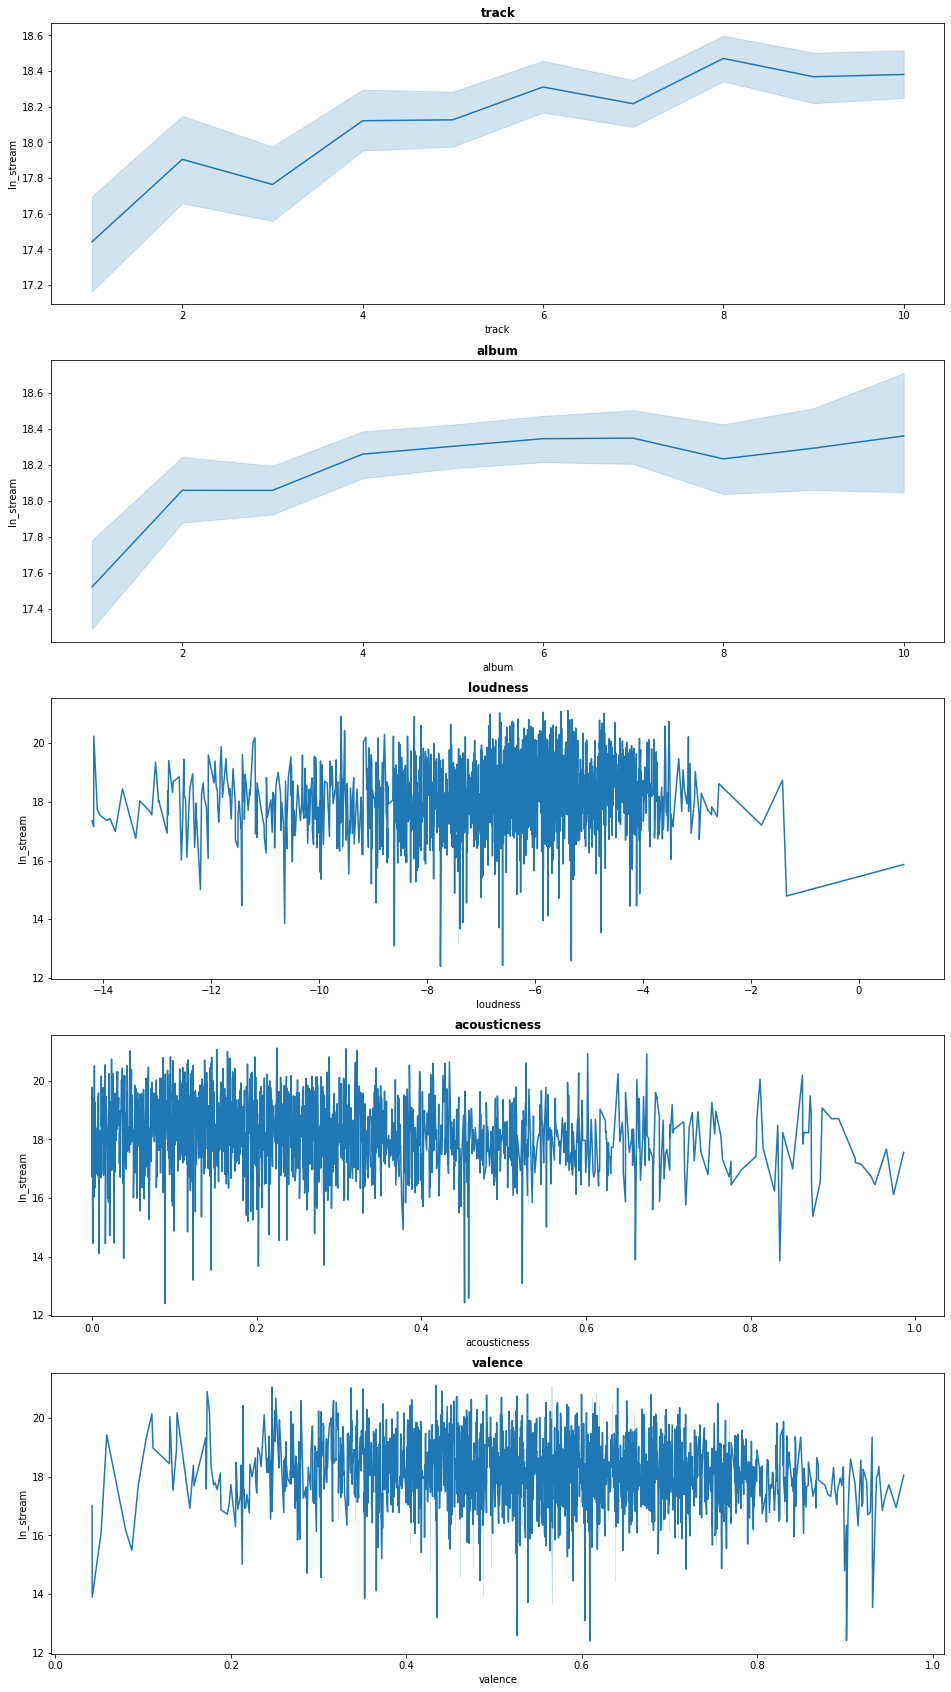

In [59]:
# Построим графики:
cols = ['track', 'album', 
        'loudness', 
        'acousticness',
        'valence']
fig, axes = plt.subplots(len(cols), 1, figsize = (16, 30))
for i in range(len(cols)):
    sns.lineplot(data = df_avg_ar, x = cols[i], y = 'ln_stream', ax = axes[i])
    axes[i].set_title(cols[i], fontdict = {'weight': 'bold'})

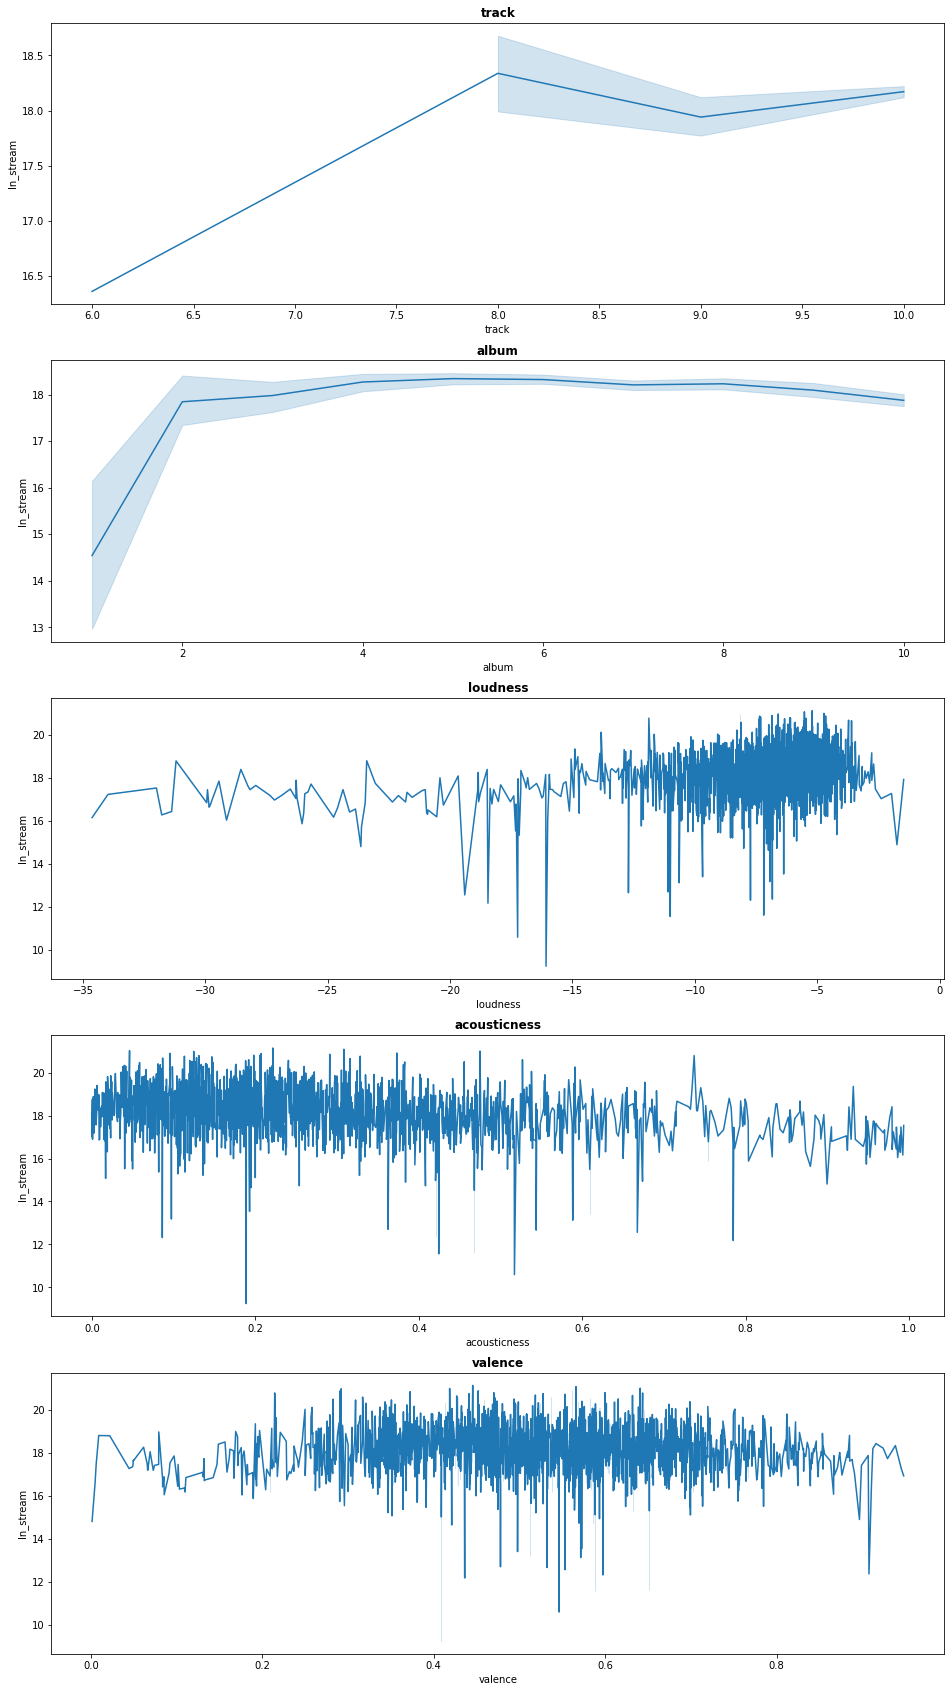

In [62]:
# Попробуем на изначальных данных:
df_old = pd.read_csv('Spotify Dataset from Kaggle.csv')
d = {}
for c in df_old.columns:
    d[c] = c.lower()
d['Unnamed: 0'] = 'id'
df_old = df_old.rename(columns = d)

df_avg_old = df_old.groupby(['artist'], as_index = False).agg({'track': 'nunique', 'album': 'nunique',
                                                                                  'danceability': 'mean', 
                                                                                  'energy': 'mean', 
                                                                                  'key': 'mean', 
                                                                                  'loudness': 'mean', 
                                                                                  'speechiness': 'mean', 
                                                                                  'acousticness': 'mean', 
                                                                                  'instrumentalness': 'mean', 
                                                                                  'liveness': 'mean', 
                                                                                  'valence': 'mean', 
                                                                                  'valence': 'mean', 
                                                                                  'tempo': 'mean', 
                                                                                  'duration_ms': 'mean', 
                                                                                  'stream': 'mean'})
df_avg_old['ln_stream'] = log_col(df_avg_old['stream'])
# Построим графики:
cols = ['track', 'album', 
        'loudness', 
        'acousticness',
        'valence']
fig, axes = plt.subplots(len(cols), 1, figsize = (16, 30))
for i in range(len(cols)):
    sns.lineplot(data = df_avg_old, x = cols[i], y = 'ln_stream', ax = axes[i])
    axes[i].set_title(cols[i], fontdict = {'weight': 'bold'})

**После группировки по артистам наблюдается слабая корреляция логарифма среднего количества прослушиваний:**

* С переменной **track** - количеством композиций у исполнителя
* С переменной **loudness** - средней громкостью композиций исполнителя
* С переменной **acousticness**


1) Положительная корреляция между количеством композиций у исполнителя и логарифмом среднего количества прослушиваний может объясняться одним из следующих тезисов:

* Чем больше прослушиваний у исполнителя, тем больше композиций он выпускает, поскольку его мотивация растет
* Чем больше композиций у артиста на площадках, тем больше шансов набрать прослушивания
* В выборке могут присутствовать состоявшиеся артисты с большим количеством композиций и прослушиваний, при этом новые исполнители будут иметь меньшее количество и композиций и прослушиваний, из-за чего возникает корреляция.

2) В силу технических особенностей процесса сведения музыкальной композиции, для того, чтобы трек звучал громко и сбалансированно, нужны либо хорошее оборудование и навыки сведения, либо услуги профессиональных специалистов и студий. 
* Теоретически может наблюдаться положительная корреляция из-за того, что более громкие треки - более качественные
* Также, более тихие композиции проседают по громкости и сбалансированности на фоне остальных, из-за чего слушатели могут их пропускать.

3) Корреляция с переменной **acousticness** может объясняться тем, что в выборке большее количество композиций (в т.ч. популярные) имеют более низкие значения этих признаков.

*Что было выявлено во время EDA анализа:*

1) Датасет содержал в себе неактуальные для нас данные - аудиокниги, треки с белым шумом, соединенные длинные треки - все это могло привести к некорректному дальнейшему анализу данных. Такие выбросы были исключены. Из 20 718 строк осталось после чистки 17 968.

2) Возможные причины пропусков:

- Spotify может не предоставлять данные о прослушиваниях для всех песен, особенно для менее популярных или более старых треков.

- Возможно, есть региональные ограничения, из-за которых данные о прослушиваниях не собираются в некоторых странах.

- Также возможно, что некоторые песни просто не были доступны для прослушивания на Spotify в определенные периоды времени.

- Ошибки при сборе данных: возможно, произошли сбои в процессе сбора информации с API Spotify.

- Изменения в API Spotify: Spotify мог изменить способ предоставления данных о прослушиваниях, что могло привести к пропускам в ранее собранных данных.

- Spotify может не раскрывать точные цифры прослушиваний для некоторых песен из-за соглашений с лейблами или артистами.

- Возможно, существуют ограничения на доступ к данным о прослушиваниях для определенных типов аккаунтов или регионов.

3) Все поля в датасете соответствовали своим типам, но мы решили улучшить типы данных части полей (stream и key) и привести к целочисленным значениям для дальнейшего удобства анализа.

4) В целом, датасет содержит разнообразные треки с точки зрения танцевальности, энергии, громкости, вокала, акустики, инструментальности, живости, позитивности, темпа и длительности.

5) В датасете нет дубликатов.

6) Были удалены треки с белым шумом, аудиокниги, треки с типом альбом compilation, треки длительностью более 7 минут, данные из поля loudness, которые выходили за рамки диапазона значений. Также с помощью боксплота были выявлены выбросы и удалены в таких полях, как `duration_min`, `energy`, `danceability`, `tempo`.

7) Целевая переменная `stream` не имеет сильной связи с другими переменными.

8) При группировке датасета по артистам наблюдается слабая корреляция логарифма среднего количества прослушиваний с количеством треков у артиста, громкостью, акустичностью и инструментальностью композиций. 

*Что нужно проверить на следующем шаге:*

1) Выделить новый признак - факт наличия приглашенного исполнителя для совместного трека (feat), и посмотреть, будет ли зависимость с другими признаками у таких треков.

2) Проверить корреляцию между связками параметров - например, `energy` + `loudness` + `stream`.